In [0]:
# Data Source

#https://catalog.data.gov/dataset/consumer-complaint-database/resource/484bc506-82b0-4225-ab10-496cf7a1c2e9


In [2]:
# import pandas as pd
# 
!wget -nc https://data.consumerfinance.gov/api/views/s6ew-h6mp/rows.csv?accessType=DOWNLOAD

--2019-04-03 19:09:55--  https://data.consumerfinance.gov/api/views/s6ew-h6mp/rows.csv?accessType=DOWNLOAD
Resolving data.consumerfinance.gov (data.consumerfinance.gov)... 52.206.68.26, 52.206.140.199, 52.206.140.205
Connecting to data.consumerfinance.gov (data.consumerfinance.gov)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [       <=>          ] 687.40M  3.71MB/s    in 4m 24s  

2019-04-03 19:14:28 (2.61 MB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [720788649]



In [0]:
!mv rows.csv?accessType=DOWNLOAD data.csv

In [4]:
!cat /etc/os-release

NAME="Ubuntu"
VERSION="18.04.2 LTS (Bionic Beaver)"
ID=ubuntu
ID_LIKE=debian
PRETTY_NAME="Ubuntu 18.04.2 LTS"
VERSION_ID="18.04"
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
VERSION_CODENAME=bionic
UBUNTU_CODENAME=bionic


In [5]:
import pandas as pd
df = pd.read_csv('data.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,5,6,11,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
df.memory_usage(deep=True).sum()

1788838721

In [7]:
df.tail()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
1251847,12/01/2011,Credit card,NaN,Billing disputes,NaN,NaN,NaN,"CITIBANK, N.A.",VA,22304,NaN,NaN,Referral,12/01/2011,Closed without relief,Yes,Yes,2090
1251848,12/01/2011,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,"SUNTRUST BANKS, INC.",AR,85395,NaN,NaN,Referral,12/01/2011,Closed without relief,Yes,No,2092
1251849,12/01/2011,Credit card,NaN,Credit determination,NaN,NaN,NaN,CAPITAL ONE FINANCIAL CORPORATION,FL,34953,NaN,NaN,Referral,12/01/2011,Closed without relief,Yes,No,2050
1251850,12/01/2011,Mortgage,FHA mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,"FLAGSTAR BANK, FSB",GA,30013,NaN,NaN,Phone,12/23/2011,Closed without relief,Yes,No,2302
1251851,12/01/2011,Credit card,NaN,Cash advance fee,NaN,NaN,NaN,JPMORGAN CHASE & CO.,CA,93546,Older American,NaN,Web,12/01/2011,Closed with relief,Yes,No,2294


In [10]:
df.shape

(1251852, 18)

In [0]:
# Remove all rows where consumer complaint narrative is not present
df = df[pd.notnull(df['Consumer complaint narrative'])]

In [12]:
df.shape

(377367, 18)

In [13]:
df.memory_usage(deep=True).sum()

849701412

In [0]:
#df = df.sample(frac=0.25)

In [0]:
# a=list(range(10))
# for i in range(13):
#   a[i]

In [0]:
%debug

--KeyboardInterrupt--


In [0]:
# from google.colab import drive
# drive.mount('/gdrive')

In [0]:
# with open('/gdrive/My Drive/foo.txt', 'w') as f:
#   f.write('Hello Google Drive!')
# !cat '/gdrive/My Drive/foo.txt'

In [0]:
from io import StringIO

In [0]:
col = ['Product', 'Consumer complaint narrative']

In [17]:
df = df[col]
df = df[pd.notnull(df['Consumer complaint narrative'])]
df.columns

Index(['Product', 'Consumer complaint narrative'], dtype='object')

In [0]:
df = df.sample(frac=0.25)

In [19]:
df.shape

(94342, 2)

In [0]:
df=df.rename(columns={'Consumer complaint narrative':'Consumer_complaint_narrative'})

In [22]:
df.columns

Index(['Product', 'Consumer_complaint_narrative'], dtype='object')

In [24]:
set(df['Product'])

{'Bank account or service',
 'Checking or savings account',
 'Consumer Loan',
 'Credit card',
 'Credit card or prepaid card',
 'Credit reporting',
 'Credit reporting, credit repair services, or other personal consumer reports',
 'Debt collection',
 'Money transfer, virtual currency, or money service',
 'Money transfers',
 'Mortgage',
 'Other financial service',
 'Payday loan',
 'Payday loan, title loan, or personal loan',
 'Prepaid card',
 'Student loan',
 'Vehicle loan or lease',
 'Virtual currency'}

In [25]:
df['category_id'] = df['Product'].factorize()[0]  # encode for categorical values
category_id_df = df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)
df.head()


,Product,Consumer_complaint_narrative,category_id
147735,"Credit reporting, credit repair services, or o...",XXXX XXXX continues to reinsert three accounts...,0
721781,Credit card,"Within 4 weeks, I have been contacted by the f...",1
77122,"Credit reporting, credit repair services, or o...","The creditor in question, XXXX XXXX, financed ...",0
89816,"Credit reporting, credit repair services, or o...","XX/XX/2018 I contact XXXX XXXX XXXX XXXX, the ...",0
70701,Debt collection,American Express called my Father on XX/XX/201...,2


In [26]:
set(df['category_id'])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17}

In [27]:
category_id_df

,Product,category_id
147735,"Credit reporting, credit repair services, or o...",0
721781,Credit card,1
70701,Debt collection,2
651278,Consumer Loan,3
510921,Money transfers,4
879472,Mortgage,5
822060,Bank account or service,6
369876,Checking or savings account,7
351646,Credit card or prepaid card,8
668102,Credit reporting,9


In [28]:
category_to_id

{'Bank account or service': 6,
 'Checking or savings account': 7,
 'Consumer Loan': 3,
 'Credit card': 1,
 'Credit card or prepaid card': 8,
 'Credit reporting': 9,
 'Credit reporting, credit repair services, or other personal consumer reports': 0,
 'Debt collection': 2,
 'Money transfer, virtual currency, or money service': 14,
 'Money transfers': 4,
 'Mortgage': 5,
 'Other financial service': 15,
 'Payday loan': 16,
 'Payday loan, title loan, or personal loan': 11,
 'Prepaid card': 12,
 'Student loan': 10,
 'Vehicle loan or lease': 13,
 'Virtual currency': 17}

In [29]:
id_to_category

{0: 'Credit reporting, credit repair services, or other personal consumer reports',
 1: 'Credit card',
 2: 'Debt collection',
 3: 'Consumer Loan',
 4: 'Money transfers',
 5: 'Mortgage',
 6: 'Bank account or service',
 7: 'Checking or savings account',
 8: 'Credit card or prepaid card',
 9: 'Credit reporting',
 10: 'Student loan',
 11: 'Payday loan, title loan, or personal loan',
 12: 'Prepaid card',
 13: 'Vehicle loan or lease',
 14: 'Money transfer, virtual currency, or money service',
 15: 'Other financial service',
 16: 'Payday loan',
 17: 'Virtual currency'}

In [30]:
df.memory_usage(deep=True).sum()

117976287

# Balance of classes

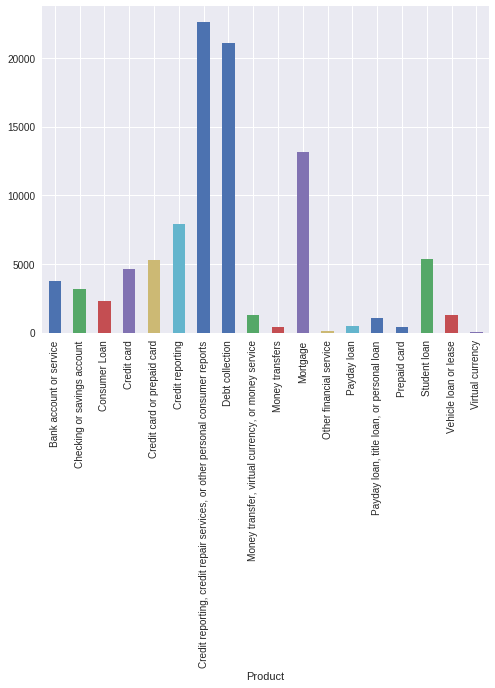

In [32]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
                 
df.groupby('Product').Consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

In [31]:
!free -m

              total        used        free      shared  buff/cache   available
Mem:          13022        1481        8328           0        3212       11627
Swap:             0           0           0


Biased towards Credit reporting, debt collection and mortgage as they are very high in number. 

However, in our case of learning imbalanced data, the majority classes might be of our great interest. It is desirable to have a classifier that gives high prediction accuracy over the majority class, while maintaining reasonable accuracy for the minority classes. Therefore, we will leave it as it is.

We will use the bag of words model to process the text complaint narraitive. It is a model where for each document, a complaint narrative in our case, the presence (and often the frequency) of words is taken into consideration, but the order in which they occur is ignored.

Term Frequency, Inverse Document Frequency, (tf-idf) is used as a calculative measure for this.

It is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.

Used as a weighting factor in searches of information retrieval, text mining, and user modeling. 

The tf–idf value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general. 

Tf–idf is one of the most popular term-weighting schemes today; 83% of text-based recommender systems in digital libraries use tf–idf.



In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
%whos   # what variables exist in memory

No variables match your requested type.


In [0]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', 
                        encoding='latin-1', ngram_range=(1, 2), 
                        stop_words='english')

In [0]:
features = tfidf.fit_transform(df.Consumer_complaint_narrative)#.toarray()

In [39]:
features

<94342x220186 sparse matrix of type '<class 'numpy.float64'>'
	with 10082574 stored elements in Compressed Sparse Row format>

In [40]:
labels = df.category_id
features.shape

(94342, 220186)

sublinear_df is set to True to use a logarithmic form for frequency.


min_df is the minimum numbers of documents a word must be present in to be kept.


norm is set to l2, to ensure all our feature vectors have a euclidian norm of 1.

ngram_range is set to (1, 2) to indicate that we want to consider both unigrams and bigrams. 


stop_words is set to "english" to remove all common pronouns ("a", "the", ...) to reduce the number of noisy features.

We can use sklearn.feature_selection.chi2 to find the terms that are the most correlated with each of the products

The chi-squared test is used to determine whether there is a significant difference between the expected frequencies and the observed frequencies in one or more categories.

In [41]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Product))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Bank account or service':
  . Most correlated unigrams:
. bank
. overdraft
  . Most correlated bigrams:
. overdraft fees
. checking account
# 'Checking or savings account':
  . Most correlated unigrams:
. overdraft
. deposit
  . Most correlated bigrams:
. savings account
. checking account
# 'Consumer Loan':
  . Most correlated unigrams:
. vehicle
. car
  . Most correlated bigrams:
. chrysler capital
. auto loan
# 'Credit card':
  . Most correlated unigrams:
. macy
. card
  . Most correlated bigrams:
. american express
. credit card
# 'Credit card or prepaid card':
  . Most correlated unigrams:
. rewards
. card
  . Most correlated bigrams:
. american express
. credit card
# 'Credit reporting':
  . Most correlated unigrams:
. experian
. equifax
  . Most correlated bigrams:
. disputed resolve
. credit report
# 'Credit reporting, credit repair services, or other personal consumer reports':
  . Most correlated unigrams:
. inquiries
. equifax
  . Most correlated bigrams:
. mistakes appea

## Multi-Class Classifier: Features and Design

To train supervised classifiers, we first transformed the “Consumer complaint narrative” into a vector of numbers. We explored vector representations such as TF-IDF weighted vectors.


After having this vector representations of the text we can train supervised classifiers to train unseen “Consumer complaint narrative” and predict the “product” on which they fall.

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB


Naive Bayes Classifier: the one most suitable for word counts is the multinomial variant:

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    df['Consumer_complaint_narrative'], df['Product'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)


In [0]:
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [45]:
#make predictions - 
# Debt collection
print(clf.predict(count_vect.transform(
    ["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."])))

['Debt collection']


In [47]:
# Credit Reporting
print(clf.predict(count_vect.transform(["I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"])))

['Credit reporting, credit repair services, or other personal consumer reports']


,Product,Consumer_complaint_narrative,category_id
57020,"Credit reporting, credit repair services, or o...",This is my second complaint with the CFPB abou...,0
66508,"Credit reporting, credit repair services, or o...",I am concerned about the validity and accuracy...,0
95939,"Credit reporting, credit repair services, or o...","I am an identity theft victim, I had an accoun...",0
56625,Credit card or prepaid card,"hello good morning, I am presenting a new repo...",1
91989,Debt collection,XXXX XXXX has hired Stenger & Stenger to colle...,2


In [48]:
print(df.iloc[3000])

Product                                               Credit card or prepaid card
Consumer_complaint_narrative    My co-workers and I work for a judge in a cour...
category_id                                                                     8
Name: 318297, dtype: object


In [49]:
print(df.iloc[3000, 1])

My co-workers and I work for a judge in a court system in Pennsylvania. We decided to have a bobblehead made of him for our annual XXXX gift exchange. I volunteered to do all the leg work and all my co-workers had to do was to pitch in their share of the cost. I looked at a few bobblehead companies on line and decided to use a company named XXXX. On XXXX/XXXX/XXXX I made initial contact with a gentleman by the name of XXXX at XXXX and e-mailed him approximately 5-6 photographs of our judge. We asked XXXX if he could make the body in a tilted or cocked pose like XXXX XXXX would pose after winning a race. We wanted the body to be covered in a black robe. XXXX informed me that I had to pre-pay for the bobblehead doll before any work would commence. I paid with my Bank of America ( BOA ) credit card the sum of {$160.00} on XXXX/XXXX/XXXX. The very next day, XXXX, XXXX e-mailed me with two pictures of the body ( proofs ) and requested me to accept it and to move onto the head. I was disappo

In [50]:
print(clf.predict(count_vect.transform([df.iloc[3000, 1]])))

['Debt collection']


## Model Selection 

We will benchmark the following four models:


Logistic Regression - Works with probability. Sigmoid where above 50 % is positive and less than 50% is negative. 


(Multinomial) Naive Bayes - Based on pure probability. P(A|X) vs P(B|X) vs P(C|X).
Internalls it is based on some independent assumptions. 


Linear Support Vector Machine - since 1960s with considerable enhancements. 
Support vectors are colsely related to opposite scenario and form the Maximum margin with positive and negative hyperplane.


Random Forest - Ensamble Algorithm - Pick k data points and build a decision tree with them Make lots of algorithms together on different k data points, might be that all algorithms are same algorithms. Finally, take the mean/median/mode of all the algorithms.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of 

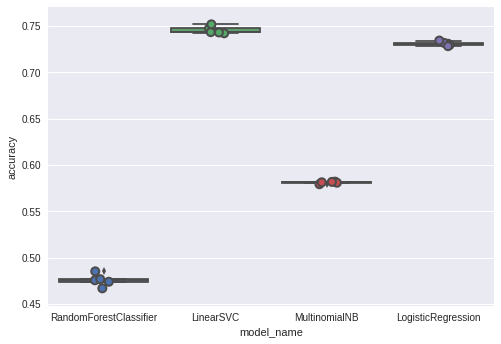

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=10, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


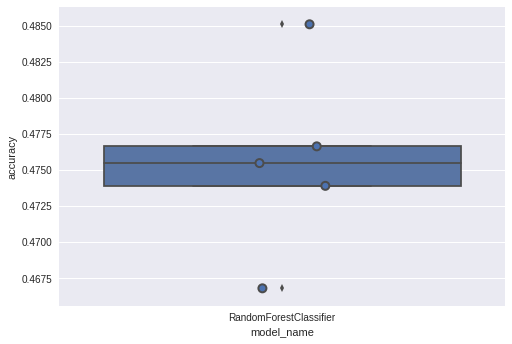

In [53]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import LinearSVC
# from sklearn.model_selection import cross_val_score
# models = [
#     RandomForestClassifier(n_estimators=200, max_depth=10, random_state=0),
# #     LinearSVC(),
# #     MultinomialNB(),
# #     LogisticRegression(random_state=0),
# ]
# CV = 5
# cv_df = pd.DataFrame(index=range(CV * len(models)))
# entries = []
# for model in models:
#   model_name = model.__class__.__name__
#   accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
#   for fold_idx, accuracy in enumerate(accuracies):
#     entries.append((model_name, fold_idx, accuracy))
# cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
# import seaborn as sns
# sns.boxplot(x='model_name', y='accuracy', data=cv_df)
# sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
#               size=8, jitter=True, edgecolor="gray", linewidth=2)
# plt.show()

In [59]:
accuracies

array([0.73076923, 0.73173316, 0.72947474, 0.72817387, 0.73421346])

In [54]:
#models[0].feature_importances_()

NotFittedError: ignored

In [60]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.745469
LogisticRegression        0.730873
MultinomialNB             0.580961
RandomForestClassifier    0.475588
Name: accuracy, dtype: float64

LinearSVC and Logistic Regression perform better than the other two classifiers, with LinearSVC having a slight advantage with a median accuracy of around 81%.

Continue with our best model (LinearSVC), we are going to look at the confusion matrix, and show the discrepancies between predicted and actual labels.

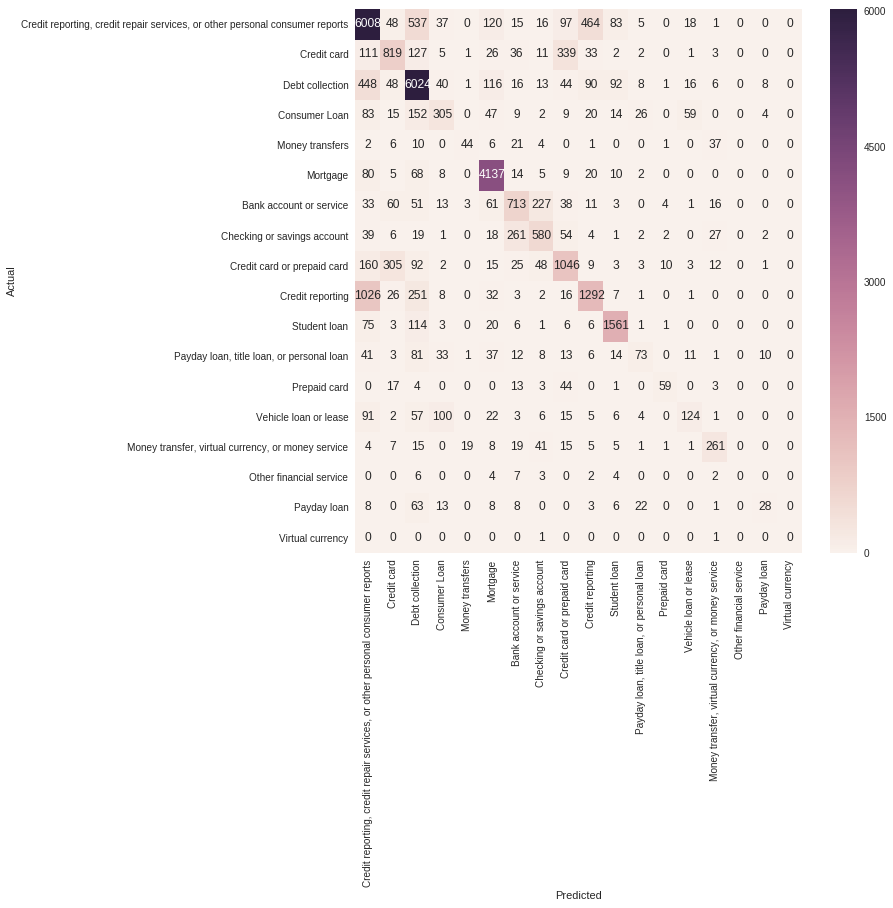

In [61]:

model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Product.values, yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

The vast majority of the predictions end up on the diagonal (predicted label = actual label), where we want them to be. However, there are a number of misclassifications, and it might be interesting to see what those are caused by


In [62]:
from IPython.display import display
for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 10:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Product', 'Consumer_complaint_narrative']])
      print('')

'Credit card' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 111 examples.


,Product,Consumer_complaint_narrative
773900,Credit card,Going over my credit report and I found an acc...
811639,Credit card,I am a long time customer of Capital One - hav...
783047,Credit card,"Dear sir, I am victim of CC fraud while I make..."
576586,Credit card,Opened a Visa account with B of A XX/XX/2007 a...
680697,Credit card,I have contacted Them at least 4 times to ask ...
664648,Credit card,Late Payments Being Reported : 90 days past du...
739366,Credit card,HSBC has a charge off listed on my credit repo...
665629,Credit card,I was a XXXX. We had credit card issued in the...
632029,Credit card,"CAPITAL ONE BANK USA XXXX, reported to the XXX..."
855064,Credit card,Bank of America was sending my statements to s...



'Debt collection' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 448 examples.


,Product,Consumer_complaint_narrative
443235,Debt collection,XXXX XXXX XXXX XXXX XXXX XXXX XXXX...
52973,Debt collection,This is the third time I have requested actual...
96190,Debt collection,"Hello, There were two cases against me and I w..."
665933,Debt collection,This is XXXX of XXXX debts reported on my cred...
446840,Debt collection,XX/XX/XXXX- Sent letter to XXXX XXXX XXXX to d...
259614,Debt collection,"ONXX/XX/XXXX, DIVERSIFIED CONSULTANT INC RESPO..."
241885,Debt collection,Noticed on my consumer profile that this close...
137699,Debt collection,SINCE XX/XX/2016 AN ACCOUNT OF XXXX IS AFFECTI...
204151,Debt collection,This debt is reporting on my credit report twi...
180531,Debt collection,Recently a debt of {$3000.00} for a medical bi...



'Consumer Loan' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 83 examples.


,Product,Consumer_complaint_narrative
728062,Consumer Loan,While I was XXXX XXXX my spouse open an instal...
788324,Consumer Loan,I had leased a XXXX in XXXX for 1 year. The le...
521812,Consumer Loan,I purchased a car from DriveTime now XXXX in X...
505636,Consumer Loan,I financed a car at XXXX in XXXX ohio on XX/XX...
599141,Consumer Loan,RE : Creditor is falsely and misleading the am...
618486,Consumer Loan,The creditor Bank of America has reported a Ch...
829724,Consumer Loan,I purchased a vehicle from Drive Time Acceptan...
772958,Consumer Loan,Mid Atlantic Finance has intentionally reporte...
635173,Consumer Loan,I am a co-borrower a car loan with my ex-husba...
638443,Consumer Loan,XXXX XXXX XXXX XXXX Open Road Lending XXXX XXX...



'Mortgage' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 80 examples.


,Product,Consumer_complaint_narrative
109853,Mortgage,SPS will not furnish all original documents se...
760108,Mortgage,XX/XX/XXXXTo Whom It May ConcernRe : Loan # XX...
102361,Mortgage,Bayview keeps writing to me about my past due ...
881566,Mortgage,I am very disappointed that the CFPB did not h...
512112,Mortgage,This complaint is related to previous complain...
338663,Mortgage,"To whom it may concern, I am inquiring about r..."
329868,Mortgage,I have a home equity line of credit with TD Ba...
186149,Mortgage,Zions is currently reporting negative account ...
324012,Mortgage,I recently was reviewing my credit report and ...
516372,Mortgage,PNC IS REFUSING TO REMOVE 2 VERY OLD ACCOUNTS ...



'Bank account or service' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 33 examples.


,Product,Consumer_complaint_narrative
727012,Bank account or service,My bank recently closed my bank account due to...
696574,Bank account or service,Paypal has closed my account down & permanentl...
837552,Bank account or service,A company known as First Data is phoning a fri...
674776,Bank account or service,CASE # XXXX This is a follow-up to my initial ...
842515,Bank account or service,Capital one bank refuses to remove fraudulent ...
798628,Bank account or service,I received a XXXX day late notice on my credit...
849719,Bank account or service,I had signed up for paypal unaware I was going...
857776,Bank account or service,Fraudulent action to freeze account
814417,Bank account or service,I contracted with XXXX XXXX Movers for service...
610511,Bank account or service,I filed a fraud dispute because a company I ma...



'Checking or savings account' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 39 examples.


,Product,Consumer_complaint_narrative
36440,Checking or savings account,I've had this bluebird account for years and a...
258279,Checking or savings account,"Greetings, Citibank has been reporting to XXXX..."
243567,Checking or savings account,A couple use ago my information was stolen and...
91800,Checking or savings account,I closed the account and recently found out th...
126399,Checking or savings account,Back in XX/XX/2012Bank of America put me in XX...
420259,Checking or savings account,The way this bank clears transactions is extre...
317017,Checking or savings account,"On XX/XX/XXXX, I reported fraud on my account ..."
270794,Checking or savings account,TD Bank recently completed a disastrous upgrad...
135762,Checking or savings account,XXXX I was an victim of a scam an identity the...
397379,Checking or savings account,I keep getting the XXXX XXXX from this company...



'Credit card or prepaid card' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 160 examples.


,Product,Consumer_complaint_narrative
167593,Credit card or prepaid card,"XX/XX/2017, XX/XX/2017 an XX/XX/2017 hard inqu..."
474654,Credit card or prepaid card,I am writing to your agency in hopes you can h...
80720,Credit card or prepaid card,"XX/XX/2018 While checking my credit report, I ..."
51686,Credit card or prepaid card,"Good Afternoon, I was shocked when I reviewed ..."
278034,Credit card or prepaid card,I got an email from XXXX XXXX saying I spent ...
337961,Credit card or prepaid card,"On the XXXX XXXX, 2017. I applied for a credit..."
78265,Credit card or prepaid card,I observed on my credit report that there was ...
329008,Credit card or prepaid card,Recently received in the past week a personali...
202195,Credit card or prepaid card,Capital One stopped reporting my balance to th...
323814,Credit card or prepaid card,"I was stunned when I reviewed my XXXX, XXXX an..."



'Credit reporting' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 1026 examples.


,Product,Consumer_complaint_narrative
797031,Credit reporting,The agency does not have my balance and limit ...
736496,Credit reporting,I received an alert via email saying that my c...
486024,Credit reporting,"On XXXX XXXX , 2017 th e IRS submitted a f..."
577514,Credit reporting,I really need your help because at this point ...
672355,Credit reporting,Victim of identity theft.Theft purpatraitor de...
608620,Credit reporting,Have put XXXX on even after power and utilitie...
553887,Credit reporting,I have disputed these issues so many times and...
488713,Credit reporting,"I noticed that Experian had, unbeknownst ( and..."
634339,Credit reporting,In Experians reply of XXXX XXXX claimed they m...
488124,Credit reporting,On XXXX 2016 I wrote Equifax asking to investi...



'Student loan' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 75 examples.


,Product,Consumer_complaint_narrative
540881,Student loan,I was approved for a forbearance and I was tol...
694864,Student loan,The student loan that I 'm complaining about. ...
631752,Student loan,ISSUES WITH PROPER PAYMENT ALLOCATION TO THE P...
192708,Student loan,XX/XX/XXXX I received an e-mail from XXXX XXXX...
427886,Student loan,I am having trouble getting correct info on wh...
227937,Student loan,Account shows late payments that are not accur...
58969,Student loan,The information shows that the account is plac...
381256,Student loan,I recently learned that my credit score droppe...
560866,Student loan,I have contacted loan servicer Ed Financial se...
230291,Student loan,"I have set up auto-pay twice with XXXX XXXX, o..."



'Payday loan, title loan, or personal loan' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 41 examples.


,Product,Consumer_complaint_narrative
379174,"Payday loan, title loan, or personal loan",Loan was initiated on XX/XX/XXXX for {$7400.00...
293911,"Payday loan, title loan, or personal loan",I spotted the account from Ad Astra on my cred...
154204,"Payday loan, title loan, or personal loan","I have gotten into a financial mess, I admit t..."
350852,"Payday loan, title loan, or personal loan","XXXX XXXX XXXX XXXX XXXX XXXX, TN XXXX \n(XXXX..."
382247,"Payday loan, title loan, or personal loan","I contacted Cash Central via Telephone Calls, ..."
456440,"Payday loan, title loan, or personal loan",In XX/XX/XXXX after many attempts by XXXX XXXX...
329767,"Payday loan, title loan, or personal loan",I already have an account with one main. I was...
373306,"Payday loan, title loan, or personal loan",On XXXX/2017 I submitted a fax to prosper to c...
186938,"Payday loan, title loan, or personal loan","On XX/XX/XXXX, 1st Franklin is reporting a "" 3..."
313440,"Payday loan, title loan, or personal loan",Since DLC did not respond to my complaint inst...



'Vehicle loan or lease' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 91 examples.


,Product,Consumer_complaint_narrative
328110,Vehicle loan or lease,"My car was damaged at the dealership, XXXX XXX..."
376185,Vehicle loan or lease,My husband and I had an auto loan from Bank of...
315354,Vehicle loan or lease,I submitted Payments on a Monthly Basis of {$4...
331598,Vehicle loan or lease,I DID NOT AUTHORIZE YOUR COMPANY TO RUN MY CRE...
244990,Vehicle loan or lease,I am requesting assistance and intervention to...
473688,Vehicle loan or lease,"In XX/XX/XXXX , I was approved for a Car Loa..."
88751,Vehicle loan or lease,I traded my car in on XX/XX/2018 at XXXX XXXX ...
207184,Vehicle loan or lease,In XX/XX/XXXX I signed a new auto lease with X...
301522,Vehicle loan or lease,"XXXX XXXX XXXX XXXX XXXX XXXX XXXX, Georgia, X..."
233157,Vehicle loan or lease,XXXX XXXX operating Manager XXXX XXXX and XXX...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Credit card' : 48 examples.


,Product,Consumer_complaint_narrative
442299,"Credit reporting, credit repair services, or o...",I was wit h Lexington Law sinc e XXXX . When ...
425212,"Credit reporting, credit repair services, or o...",This complaint is regarding CITI XXXX credit c...
458901,"Credit reporting, credit repair services, or o...",My XXXX credit credit card account which was...
251305,"Credit reporting, credit repair services, or o...",The purpose of my compliant is to address frau...
142954,"Credit reporting, credit repair services, or o...",I was shocked when I reviewed my credit report...
312589,"Credit reporting, credit repair services, or o...",XXXX XXXX account is now in deliquency through...
347639,"Credit reporting, credit repair services, or o...","All my American express account is settled, we..."
372474,"Credit reporting, credit repair services, or o...","Today, XXXX XXXX I received a credit alert tha..."
296726,"Credit reporting, credit repair services, or o...",Got accepted for the card but still got an inq...
228495,"Credit reporting, credit repair services, or o...",I have several accounts with US bank. One of t...



'Debt collection' predicted as 'Credit card' : 48 examples.


,Product,Consumer_complaint_narrative
847702,Debt collection,I never have had any credit cards in my life e...
729217,Debt collection,My wife made a purchase at Kohls in XXXX. Indi...
143105,Debt collection,Capital one creditcard I have this credit card...
739972,Debt collection,I have been having hardship since my job of se...
596609,Debt collection,Made an settlement agreement and not honoring ...
785210,Debt collection,"Discover Card had, at XXXX time, authorization..."
799991,Debt collection,"Kohl 's department store keeps calling me, at ..."
86268,Debt collection,Last year someone opened a Kohls department st...
385778,Debt collection,GE Capital Retail Bank approved a fraud online...
326445,Debt collection,XXXX XXXX claims that I have two accounts One ...



'Consumer Loan' predicted as 'Credit card' : 15 examples.


,Product,Consumer_complaint_narrative
623014,Consumer Loan,I attempted to make a payment arrangement with...
735075,Consumer Loan,I made a {$25.00} purchase on my Belk card in ...
758244,Consumer Loan,"XXXX, SYNCHRONY, AND XXXX On XXXX XXXX, 2015 I..."
876114,Consumer Loan,1. XX/XX/2015 (? ) I cancelled autopay for XX/...
707482,Consumer Loan,I have received hundreds of calls from this co...
525658,Consumer Loan,I visited a Costco at the location in XXXX XXX...
561337,Consumer Loan,"US Bank is knowingly and intentionally, provid..."
599582,Consumer Loan,"Last year, XXXX, XXXX - XXXX, XXXX, I relocate..."
688645,Consumer Loan,GE Capital Retail Bank/Care Credit made paymen...
805403,Consumer Loan,In XXXX 2015 I received a bill from Macys for ...



'Bank account or service' predicted as 'Credit card' : 60 examples.


,Product,Consumer_complaint_narrative
754999,Bank account or service,"XX/XX/2015, I used the Commuter Check Card fro..."
555306,Bank account or service,Hi sir/ Madam This is XXXX XXXX i booked ticke...
518456,Bank account or service,I received a second letter on Citi letterhead ...
644337,Bank account or service,"Hello, i m living in XXXX and i opened a well ..."
708965,Bank account or service,I have called Paypal no lie over 30 times and ...
663262,Bank account or service,Paypal Credit is requesting a high minimum pay...
655368,Bank account or service,I signed up with PNC Merchant Services on XXXX...
557893,Bank account or service,The following quote was posted on XXXX which i...
680391,Bank account or service,Navy Federal allows real-time transfers from X...
783087,Bank account or service,They keep charging me over draft fee and matie...



'Credit card or prepaid card' predicted as 'Credit card' : 305 examples.


,Product,Consumer_complaint_narrative
311927,Credit card or prepaid card,"I purchased a promotion item, interest free fo..."
420479,Credit card or prepaid card,I was shocked when I reviewed my credit report...
473397,Credit card or prepaid card,In XXXX XXXX we purchased furniture from A...
388362,Credit card or prepaid card,I called their rep - XXXX from the Montana cal...
195794,Credit card or prepaid card,I have an account with Pay Pal. They have froz...
215802,Credit card or prepaid card,XX/XX/2017 an employee of Chase called from th...
114403,Credit card or prepaid card,Bank of America corruptly and fraudulently add...
476726,Credit card or prepaid card,even though I made payments to citi bank..it ...
322443,Credit card or prepaid card,This year I just went through a divorce and I ...
266706,Credit card or prepaid card,American Express is exploiting flaws in the CF...



'Credit reporting' predicted as 'Credit card' : 26 examples.


,Product,Consumer_complaint_narrative
493505,Credit reporting,Citibank said they would not run my credit whe...
825035,Credit reporting,I am not sure you can help me but I have revie...
562714,Credit reporting,"XXXX, NY XXXX, NY XXXX These are not my addres..."
491942,Credit reporting,I filed a police report for identify theft and...
596504,Credit reporting,The credit card company erroneously charged me...
686837,Credit reporting,"On XXXX XXXX, 2016, I received a letter of den..."
766693,Credit reporting,"I signed up for a "" free '' credit report at t..."
759184,Credit reporting,They will not even talk to me because there is...
628621,Credit reporting,I subscribe to Experian and on XXXX I received...
498003,Credit reporting,In XX/XX/2016 I called to downgrade my Citi Th...



'Prepaid card' predicted as 'Credit card' : 17 examples.


,Product,Consumer_complaint_narrative
659368,Prepaid card,There was XXXX unauthorized transactions on my...
878406,Prepaid card,I was offered a pre-paid card from Continental...
794015,Prepaid card,US Bank Corp denied me the ability to rescind ...
614524,Prepaid card,"On XXXX/XXXX/16, I attempted to log into the C..."
824759,Prepaid card,On Several times I contact American Express an...
616211,Prepaid card,"I had XXXX pre paid cards with XXXX, A MasterC..."
638589,Prepaid card,"I CONTACTED DIRECT EXPRESS ON XXXX XXXX, WHEN ..."
671564,Prepaid card,I paid off my Pay Pal Credit in full except fo...
628920,Prepaid card,I used my American Express Bluebird card to wi...
548786,Prepaid card,I received a {$200.00} American Express giftca...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Debt collection' : 537 examples.


,Product,Consumer_complaint_narrative
199644,"Credit reporting, credit repair services, or o...",FINAL NOTICE PRIOR TO FILING SUIT ON XX/XX/XXX...
161082,"Credit reporting, credit repair services, or o...",I received an alert today that my credit score...
429758,"Credit reporting, credit repair services, or o...",I have requested proof of validation on severa...
358413,"Credit reporting, credit repair services, or o...",INACCURATE INFOMATION ON CREDIT REPORT SO I SE...
108803,"Credit reporting, credit repair services, or o...","I settled this with XXXX XXXX XXXX XXXX, XXXX ..."
398189,"Credit reporting, credit repair services, or o...",Back in XX/XX/XXXX i join XXXX and i was with ...
396056,"Credit reporting, credit repair services, or o...","Apparently back in XX/XX/XXXX, I visited the d..."
353186,"Credit reporting, credit repair services, or o...",XXXX has XXXX XXXX XXXX on my Credit Report as...
453161,"Credit reporting, credit repair services, or o...",XXXX inc has listed collection accounts on my...
328122,"Credit reporting, credit repair services, or o...",No response



'Credit card' predicted as 'Debt collection' : 127 examples.


,Product,Consumer_complaint_narrative
808418,Credit card,Bank of America Continues to report derogatory...
615392,Credit card,I I paid my credit card in full I desputedit d...
658273,Credit card,"I have been receiving harassing, threatening a..."
837339,Credit card,breach of contract for failure to inform me of...
828981,Credit card,My Chase Bank Credit Card was discharged. Then...
640336,Credit card,My daughter and I purchased an adjustable bed ...
553767,Credit card,Due to financial hardship I was unable to keep...
807596,Credit card,I called the credit issuer to request a paymen...
574234,Credit card,I contacted the company ( XXXX XXXX Confirmati...
658181,Credit card,I am a victim of identity theft of Barclays Ba...



'Consumer Loan' predicted as 'Debt collection' : 152 examples.


,Product,Consumer_complaint_narrative
502253,Consumer Loan,Please note that I was rudely contacted as was...
662100,Consumer Loan,I bought furniture through Conn 's and finance...
831201,Consumer Loan,I would like to explain the problem. I purchas...
548788,Consumer Loan,My vehicle was taken in the end of 2013 due to...
733555,Consumer Loan,I tried to make a payment on my loan online. M...
731899,Consumer Loan,I have a title loan on my XXXX Chevrolet Equin...
738946,Consumer Loan,I have sent CAPITAL ONE BANK legal documents l...
752800,Consumer Loan,I 'm not really sure if this is relevant to CF...
652547,Consumer Loan,"The debt documented in the Public Record, XXXX..."
743910,Consumer Loan,I was paying on a collections that was on my c...



'Money transfers' predicted as 'Debt collection' : 10 examples.


,Product,Consumer_complaint_narrative
831598,Money transfers,My wife used to send money to XXXX. she died X...
737359,Money transfers,I got scammed when buying a XXXX in XXXX of Le...
803687,Money transfers,"I received a phone call from the "" FBI '' ( ha..."
701869,Money transfers,I submitted money to a XXXX Confererence organ...
680371,Money transfers,I friend XXXX dad sent me a friend request on ...
787898,Money transfers,supossedly I was sent a text message from an a...
766256,Money transfers,Paypal went ahead and put limitations on my ac...
646419,Money transfers,We were victims of a fraudulent/scam. We recei...
636050,Money transfers,I was almost victimized by a company because t...
819091,Money transfers,XXXX XXXX XXXX XXXX has failed to provide docu...



'Mortgage' predicted as 'Debt collection' : 68 examples.


,Product,Consumer_complaint_narrative
494213,Mortgage,"Currently, I am XXXX in the military and my pl..."
834405,Mortgage,COMPLAINT # XXXXAfter request for help from XX...
678324,Mortgage,"I just submitted my complaint yesterday, case ..."
226524,Mortgage,I spoke with 2 different reps on XXXX18. My lo...
567137,Mortgage,XXXX XXXX see attached spreadsheet. Numerous v...
324293,Mortgage,"XXXX 2017, XXXX I have contacted this company ..."
742518,Mortgage,"Hello, I need help. Wells Fargo claims I have ..."
771009,Mortgage,Georgia Dept of Bankingand finance have refuse...
588695,Mortgage,"Seterus LLC, a limited liability company Extor..."
506186,Mortgage,Loan Servicing company trying to collect disch...



'Bank account or service' predicted as 'Debt collection' : 51 examples.


,Product,Consumer_complaint_narrative
592573,Bank account or service,Navy Federal Credit Union ( NFCU ) implemented...
623731,Bank account or service,I call up to make a payment usually day before...
780594,Bank account or service,I tried opening an Account with XXXX ... ..sub...
635610,Bank account or service,After making arrangements with Midland Funding...
560778,Bank account or service,"As I explained before ... .your "" investigatio..."
523518,Bank account or service,I purchased security for my computer in XX/XX/...
486032,Bank account or service,USAA opened an account using variations of my ...
751707,Bank account or service,"Hello, I have received a mail dated back to XX..."
861306,Bank account or service,Someone called at XXXX saying there was a prob...
685135,Bank account or service,Wells Fargos teller deposited a check made pay...



'Checking or savings account' predicted as 'Debt collection' : 19 examples.


,Product,Consumer_complaint_narrative
51226,Checking or savings account,"On Tuesday, XX/XX/XXXX, I found my SunTrust sa..."
258230,Checking or savings account,I had an overdraft for a {$160.00} and paid it...
274272,Checking or savings account,I have been notified in the month of XXXX 2018...
47184,Checking or savings account,"To whom it may concern, refer to complaint num..."
199590,Checking or savings account,I used mobile deposite to put my two paychecks...
68454,Checking or savings account,I added my son to my NFCU business account as ...
35871,Checking or savings account,I am XXXX years. Wells Fargo has bee manipulat...
90614,Checking or savings account,I'm on XXXX my check go to XXXX they have my m...
460415,Checking or savings account,NEW COMPLAINT UNRELATED TO ANY OTHER CASES Cre...
331963,Checking or savings account,"I rented a vacation apartment online, and upon..."



'Credit card or prepaid card' predicted as 'Debt collection' : 92 examples.


,Product,Consumer_complaint_narrative
296154,Credit card or prepaid card,My husband XXXX XXXX X/XX/2017 ( he went to be...
289690,Credit card or prepaid card,Discover Card keeps calling me at my home sayi...
280195,Credit card or prepaid card,"Hello, I have been harassed for multiple years..."
471043,Credit card or prepaid card,"On XXXX XXXX , 2017 , I signe d up ( o n-l..."
179899,Credit card or prepaid card,Capital One tells me I owe {$380.00} as of XX/...
301063,Credit card or prepaid card,My credit report shows a lot of accounts that ...
369083,Credit card or prepaid card,My father died in XXXX and had a balance on a ...
253991,Credit card or prepaid card,My identity was stolen twice during the past f...
195213,Credit card or prepaid card,"About 2-3 years ago, I went shopping for new b..."
106008,Credit card or prepaid card,"After paying the large amount off in full, I a..."



'Credit reporting' predicted as 'Debt collection' : 251 examples.


,Product,Consumer_complaint_narrative
766150,Credit reporting,was contacted by collection agency proved debt...
583346,Credit reporting,"XXXX XXXX XXXX account was received, paid & sa..."
665155,Credit reporting,I have never lived in XXXX and there is an add...
709672,Credit reporting,XXXX XXXX XXXX XXXX XXXX this balance was for ...
483382,Credit reporting,In XXXX of XXXX I received my credit rep...
830278,Credit reporting,"In XXXX XXXX, I enrolled in XXXX Debt Relief. ..."
811975,Credit reporting,I have XXXX paid medical bills showing on my c...
783183,Credit reporting,I have requested this creditor validate or ver...
573283,Credit reporting,This company XXXX XXXX filed a debt on my cred...
572306,Credit reporting,I disputed a tax lien in the amount of {$740.0...



'Student loan' predicted as 'Debt collection' : 114 examples.


,Product,Consumer_complaint_narrative
687129,Student loan,ON XXXX/XXXX/XXXX I contacted South University...
457867,Student loan,"From XX/XX/XXXX through XX/XX/XXXX , I made..."
491934,Student loan,"By letter dated XX/XX/XXXX, and received on XX..."
546159,Student loan,As of XX/XX/XXXX my wife and I had prepaid her...
696024,Student loan,"I work in a XXXX, Windham professionals has co..."
827041,Student loan,My student loan with AES/National Collegiate t...
168902,Student loan,I was contacted by Ameritech Financial and fel...
123976,Student loan,Navient is currently charging off multiple acc...
495093,Student loan,I was contacted by a representative from Perfo...
701408,Student loan,I have been battling with this company for mon...



'Payday loan, title loan, or personal loan' predicted as 'Debt collection' : 81 examples.


,Product,Consumer_complaint_narrative
335908,"Payday loan, title loan, or personal loan","On XX/XX/XXXX, I received approval for a {$500..."
71205,"Payday loan, title loan, or personal loan","I Got a Loan through XXXX XXXX in XXXX, Oklah..."
375630,"Payday loan, title loan, or personal loan","To whom it may concern, I have been dealing wi..."
425962,"Payday loan, title loan, or personal loan","On my XXXX report, Net Credit as of,XX/XX/XXXX..."
475424,"Payday loan, title loan, or personal loan",Been paying this company 2 payments every 2 ...
421338,"Payday loan, title loan, or personal loan",I got a loan with Goldman Sachs for XXXX. The ...
69156,"Payday loan, title loan, or personal loan","On XX/XX/2018, I received an e-mail from XXXX ..."
330838,"Payday loan, title loan, or personal loan",A collection was added on my credit report fro...
189955,"Payday loan, title loan, or personal loan",I had a consultation with a XXXX regarding XXX...
266588,"Payday loan, title loan, or personal loan",I was out of work for a couple of months and I...



'Vehicle loan or lease' predicted as 'Debt collection' : 57 examples.


,Product,Consumer_complaint_narrative
150579,Vehicle loan or lease,I received a car loan from American Credit Acc...
465279,Vehicle loan or lease,In XXXX 2016 I received a bill from Toyota Fin...
464143,Vehicle loan or lease,"XX/XX/XXXX , day before my XXXX birthday ..."
369085,Vehicle loan or lease,"On XXXX XXXX, 2017, I received a call from a d..."
353340,Vehicle loan or lease,My vehicle was repossessed in XXXX XXXX. A set...
341745,Vehicle loan or lease,A payment was scheduled on XX/XX/XXXX with XXX...
337921,Vehicle loan or lease,In XXXX i called trying to work something out ...
98255,Vehicle loan or lease,"AC Auto Pay located in XXXX, CO claims that I ..."
86448,Vehicle loan or lease,I am being harassed daily by a company about a...
337567,Vehicle loan or lease,I leased a XXXX XXXX through Ally Financial an...



'Money transfer, virtual currency, or money service' predicted as 'Debt collection' : 15 examples.


,Product,Consumer_complaint_narrative
450778,"Money transfer, virtual currency, or money ser...",I have an account with a payday lender and the...
146677,"Money transfer, virtual currency, or money ser...",Dear to whom it may concern.\n\nIt is extremel...
217332,"Money transfer, virtual currency, or money ser...",hi i m sending money to my mom and my wife and...
307527,"Money transfer, virtual currency, or money ser...",On XX/XX/XXXX at XXXX XXXX I sold XXXX Litecoi...
364862,"Money transfer, virtual currency, or money ser...",I was sending XXXX to an military person of hi...
301620,"Money transfer, virtual currency, or money ser...",I called to get my account to stop blocking lo...
55836,"Money transfer, virtual currency, or money ser...","I was doing a trade for a copy of XXXX XXXX, m..."
67040,"Money transfer, virtual currency, or money ser...","I was using an app called "" XXXX '' which all..."
171835,"Money transfer, virtual currency, or money ser...","I bought an XXXX XXXX XXXX, Fully Unlocked 5.8..."
62256,"Money transfer, virtual currency, or money ser...",XXXX XXXX XXXX XXXX. I'm the one who made curr...



'Payday loan' predicted as 'Debt collection' : 63 examples.


,Product,Consumer_complaint_narrative
880302,Payday loan,My balance was under {$50.00} and they added c...
823684,Payday loan,I have multiple loan services sending me email...
698719,Payday loan,XXXX The pay day loan company keeps charging m...
488269,Payday loan,One Click Cash XXXX keeps contacting me after ...
832291,Payday loan,This lender keeps contacting me about a closed...
685964,Payday loan,The charges went for {$160.00} to {$390.00} .....
534759,Payday loan,Recived email stating I will have to go to dis...
531329,Payday loan,The opened date for this alleged debt with Ad ...
490546,Payday loan,I received a call today from a company stating...
528915,Payday loan,I recieved a loan for {$460.00} about five yea...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Consumer Loan' : 37 examples.


,Product,Consumer_complaint_narrative
467836,"Credit reporting, credit repair services, or o...",I should have been advised that because an add...
440031,"Credit reporting, credit repair services, or o...",I applied for a loan that I was approved for o...
256311,"Credit reporting, credit repair services, or o...",I had a loan on a car for 12 years. This is il...
270271,"Credit reporting, credit repair services, or o...",the car was taken away because of limit inform...
434435,"Credit reporting, credit repair services, or o...",I have been leasing a 2016 Toyota XXXX . I ...
132932,"Credit reporting, credit repair services, or o...",I have been trying to fight the fraudulent rep...
278550,"Credit reporting, credit repair services, or o...",set up auto loan payment and it didn't go thro...
138916,"Credit reporting, credit repair services, or o...",American Honda Finance is willing reporting fa...
325949,"Credit reporting, credit repair services, or o...",capital one auto finance 10 hard inquerys in o...
404553,"Credit reporting, credit repair services, or o...",Helped a friend to purchase a car in 2012. I g...



'Debt collection' predicted as 'Consumer Loan' : 40 examples.


,Product,Consumer_complaint_narrative
137941,Debt collection,"Excessive contacts daily, including calling re..."
579988,Debt collection,On XXXX/XXXX/2016 a not safe cargo van was pur...
615780,Debt collection,There is a collection charge on my credit repo...
802094,Debt collection,"XXXX, and other employees from security financ..."
456607,Debt collection,"Subject : Your submission, [ Case number : XX..."
207933,Debt collection,I leased furniture with a company called Accep...
569373,Debt collection,False information on my credit report regardin...
561341,Debt collection,Date XXXX/XXXX/XXXX XXXX XXXX XXXX XXXX XXXX X...
863488,Debt collection,I have a personal loan with One Main Finance. ...
843944,Debt collection,I 'm currently paying a loan by the month and ...



'Bank account or service' predicted as 'Consumer Loan' : 13 examples.


,Product,Consumer_complaint_narrative
566056,Bank account or service,I had a car loan with First Niagra Bank. The l...
830360,Bank account or service,I had a checking account at Associated Bank. I...
794559,Bank account or service,I recently ordered my credit files and found t...
599744,Bank account or service,I was distraught to see my car missing as we e...
795154,Bank account or service,I recently ordered my credit files and found t...
564600,Bank account or service,I recently purchased a vehicle from a dealersh...
721325,Bank account or service,CC payment of {$47.00} due XXXX/XXXX/16. Paid ...
651305,Bank account or service,Santander Consumer USA took an unauthorized wi...
789440,Bank account or service,I am having Ally checking account and I was us...
587170,Bank account or service,"My checking account with Huntington Bank, # XX..."



'Payday loan, title loan, or personal loan' predicted as 'Consumer Loan' : 33 examples.


,Product,Consumer_complaint_narrative
361143,"Payday loan, title loan, or personal loan","After making my first payment in XXXX XXXX, I ..."
187896,"Payday loan, title loan, or personal loan",I have a loan with Lendmark Financial Services...
146631,"Payday loan, title loan, or personal loan",I requested to pay off the loan in one payment...
176386,"Payday loan, title loan, or personal loan",I have contacted the ( XXXX XXXX ) a few times...
321962,"Payday loan, title loan, or personal loan",I took out a {$4000.00} loan from Mariner Fina...
285550,"Payday loan, title loan, or personal loan","Received a title loan form XXXX, in meantime m..."
84139,"Payday loan, title loan, or personal loan",We obtained a retail installment loan to purch...
243944,"Payday loan, title loan, or personal loan",This company sends a statement with billing in...
429891,"Payday loan, title loan, or personal loan",We were paying off the loan I looked at the we...
335337,"Payday loan, title loan, or personal loan","XXXX XXXX XXXX XXXX XXXX XXXX XXXX, CO XXXX XX..."



'Vehicle loan or lease' predicted as 'Consumer Loan' : 100 examples.


,Product,Consumer_complaint_narrative
314742,Vehicle loan or lease,When looking for financing to buyout my vehicl...
81241,Vehicle loan or lease,On XX/XX/XXXX I purchased a XXXX XXXX XXXX fro...
171715,Vehicle loan or lease,Purchased a new XXXX XXXX XXXX. Ford gives dis...
213105,Vehicle loan or lease,"After paying off my Ally auto loan, they claim..."
166176,Vehicle loan or lease,I contacted the dealership once I drove off th...
466584,Vehicle loan or lease,"On XXXX XXXX XXXX , I purchased a XXX..."
460683,Vehicle loan or lease,Opened car loan in XXXX XXXX . Auto was tot...
372736,Vehicle loan or lease,"On XX/XX/XXXX, Santander Consumer USA reposses..."
328788,Vehicle loan or lease,For many years my husband and I have struggled...
355831,Vehicle loan or lease,I paid off my auto loan from Hyundai Motor Fin...



'Payday loan' predicted as 'Consumer Loan' : 13 examples.


,Product,Consumer_complaint_narrative
813483,Payday loan,I have dealt with this company before. My payd...
615582,Payday loan,"Yes, I had been a victim of fraud and scam for..."
643838,Payday loan,I recieved a XXXX loan from big picture loans....
711470,Payday loan,"I took a "" payday loan '' from XXXX XXXX for {..."
810906,Payday loan,I never got this loan.
876820,Payday loan,Niece took out loan with Castle Payday loans i...
537834,Payday loan,"Mobiloans , LLC is an online payday loan compa..."
642082,Payday loan,Despite my repeated requests for them to desis...
787132,Payday loan,"I got a loan from castle pay day loan, at time..."
779977,Payday loan,Borrowed XXXX finance change every time l make...



'Money transfer, virtual currency, or money service' predicted as 'Money transfers' : 19 examples.


,Product,Consumer_complaint_narrative
165419,"Money transfer, virtual currency, or money ser...","On XX/XX/2017, I saw that someone had made an ..."
359987,"Money transfer, virtual currency, or money ser...",Complaint against Western Union Location in XX...
234859,"Money transfer, virtual currency, or money ser...",My husband used my name to send money to my co...
396186,"Money transfer, virtual currency, or money ser...",I would like to trace all Money Gram payments ...
409238,"Money transfer, virtual currency, or money ser...",The response by Paypal to my complaint # XXXX ...
338994,"Money transfer, virtual currency, or money ser...",I was supposed to send money to this person an...
148840,"Money transfer, virtual currency, or money ser...","On XX/XX/2018, I attempted to deposit {$1200.0..."
82505,"Money transfer, virtual currency, or money ser...",On XX/XX/18 I submitted a transfer for Bill Pa...
138092,"Money transfer, virtual currency, or money ser...",I sold an item to a person through facebook pa...
359976,"Money transfer, virtual currency, or money ser...",I recently made an XXXX sale of {$65.00} to a ...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Mortgage' : 120 examples.


,Product,Consumer_complaint_narrative
381558,"Credit reporting, credit repair services, or o...",We went to court and received a judgement onXX...
117487,"Credit reporting, credit repair services, or o...","In XX/XX/XXXX, I received notification from Se..."
267306,"Credit reporting, credit repair services, or o...",In the beginning of XX/XX/XXXX - sometime arou...
106905,"Credit reporting, credit repair services, or o...",My mortgage is with Freedom Mortgage. They pur...
49142,"Credit reporting, credit repair services, or o...",My home mortgage was refinanced with XXXX XXXX...
265261,"Credit reporting, credit repair services, or o...",J.P. Morgan Chase Bank and NA subsidiary J.P. ...
262670,"Credit reporting, credit repair services, or o...",XXXX XXXX said they would not put any negative...
345576,"Credit reporting, credit repair services, or o...","Wells Fargo is AGAIN, continuing it well docum..."
356110,"Credit reporting, credit repair services, or o...",I have a missed payement with XXXX currently i...
69524,"Credit reporting, credit repair services, or o...",I contacted Citimortgage in advance about modi...



'Credit card' predicted as 'Mortgage' : 26 examples.


,Product,Consumer_complaint_narrative
726609,Credit card,the credit card issuer navy federal fabricated...
668919,Credit card,I XXXX XXXX filed bankruptcy chapter XXXX four...
512228,Credit card,Dear Sir or Madam : Bank of America continues ...
591205,Credit card,1 ) On XXXX/XXXX/2016 I experienced ID theft (...
592315,Credit card,After numerous attempts to explain that my pay...
552357,Credit card,I 'm having an issues with Barclaycard process...
546161,Credit card,I had a bankruptcy and had a judgement taken c...
522055,Credit card,Citibank called XX/XX/XXXX to tell me the paym...
801762,Credit card,Ref : Bank of AmericaI have been working with ...
757227,Credit card,I updated my email through the Kohls website a...



'Debt collection' predicted as 'Mortgage' : 116 examples.


,Product,Consumer_complaint_narrative
321466,Debt collection,"This complaint is against XXXX XXXX XXXX, XXXX..."
75477,Debt collection,OWR NOTICE OF ERROR 524 Injunction : Bank of A...
700115,Debt collection,Ocwen Loan Servicing continues to send us lett...
663532,Debt collection,Select Portfolio Servicing is a debt collector...
635013,Debt collection,In XXXX 2016 I applied for a Home Mortgage at ...
695331,Debt collection,"Shellpoint Mortgage Services XXXX, fraudulentl..."
156952,Debt collection,Select Portfolio Servicing ( SPS ) is in viola...
642518,Debt collection,keep calling me saying I took out a second mor...
405241,Debt collection,XX/XX/XXXX XXXX QWR NOTICE OF ERROR Loan : XXX...
469179,Debt collection,Navy Federal Credit i s reporting a $ XXXX {...



'Consumer Loan' predicted as 'Mortgage' : 47 examples.


,Product,Consumer_complaint_narrative
647140,Consumer Loan,I have been attempting to have late payments r...
591301,Consumer Loan,Due to circumstances out of my control I got b...
636522,Consumer Loan,instaloan lied and told me my interest was a 2...
518684,Consumer Loan,"The BMO Harris Bank auto loan department, loan..."
517039,Consumer Loan,We paid off a home equity line of credit with ...
818653,Consumer Loan,Lyon Financial has approved me for a pool loan...
563388,Consumer Loan,I had a account with Honda Financial that was ...
777671,Consumer Loan,I originally took a loan from Santander on XXX...
842757,Consumer Loan,Middlegate Funding is such a rip off and I wou...
586998,Consumer Loan,When I purchased my new lease I specified I wa...



'Bank account or service' predicted as 'Mortgage' : 61 examples.


,Product,Consumer_complaint_narrative
583846,Bank account or service,Navy Federal CU from XX/XX/2015 through now co...
556281,Bank account or service,I had several mortgages with Bank of America b...
554924,Bank account or service,Made several attempts to pay mortgage via phon...
535153,Bank account or service,I LIVE IN A BANK OWNED HOUSE. I WANT TO BUY IT...
576610,Bank account or service,"To whom it may concern, I '' m filing this com..."
735329,Bank account or service,Morgan Stanley mis-reported our XXXX XXXX cont...
747118,Bank account or service,I live in a subdivision which includes a XXXX ...
819043,Bank account or service,I had an insurance claim at my house about 2 m...
874190,Bank account or service,I have been unemployed for the past XXXX month...
520225,Bank account or service,My bank account by Wells Fargo bank is being r...



'Checking or savings account' predicted as 'Mortgage' : 18 examples.


,Product,Consumer_complaint_narrative
444681,Checking or savings account,Wells fargo is not reporting deposits in a tim...
289596,Checking or savings account,My bank ( Wells Fargo ) is holding my monthly ...
427958,Checking or savings account,I 'm trying to use active hours to get a advan...
406653,Checking or savings account,"To whom this may concern, Please have this inf..."
146402,Checking or savings account,Citizens Bank- Again.\n\nPayments that posted ...
421818,Checking or savings account,"Our father died ( XX/XX/XXXX ), and my sister ..."
91421,Checking or savings account,I a partial payment of {$400.00} for my mortga...
450145,Checking or savings account,Bank of america is not sending right info of m...
116962,Checking or savings account,I filed a Small Claim Petition against Comeric...
286400,Checking or savings account,I purchased a home in XX/XX/XXXX. The mortgage...



'Credit card or prepaid card' predicted as 'Mortgage' : 15 examples.


,Product,Consumer_complaint_narrative
108556,Credit card or prepaid card,I received a letter from Chase lending service...
481476,Credit card or prepaid card,I have actually resolved this problem but am v...
298432,Credit card or prepaid card,Payment was due XX/XX/XXXX. Payment processed ...
213767,Credit card or prepaid card,I was told a supervisor was going to call me a...
144933,Credit card or prepaid card,I have been a customer of Wells Fargo for over...
258320,Credit card or prepaid card,Citbank issued me a credit card with a 24.24 %...
468299,Credit card or prepaid card,I have an ongoing problem with a website that ...
288150,Credit card or prepaid card,Statement closed XX/XX/XXXX. Payment due XX/XX...
208055,Credit card or prepaid card,case # XXXX It really is very simple I followe...
470839,Credit card or prepaid card,3 : What happened? On XXXX/XXXX/XXXX XXXX XXXX...



'Credit reporting' predicted as 'Mortgage' : 32 examples.


,Product,Consumer_complaint_narrative
643537,Credit reporting,I noticed anytime an mortgage is is transferre...
704282,Credit reporting,XXXX XXXX falsely reported a late payment on m...
650532,Credit reporting,"on several accounts, there is a mortgage liste..."
810797,Credit reporting,Last year I made a construction loan and began...
774716,Credit reporting,I did not get a mortgage loan from XXXX conven...
858121,Credit reporting,There is a tax lien for XXXX dollars that I do...
854714,Credit reporting,My name is XXXX XXXX XXXX and my wife is XXXX ...
531736,Credit reporting,I have been penalized for paying off my debts....
757563,Credit reporting,I contacted TRans Union and did an online disp...
520799,Credit reporting,1 Tax Lien XX/XX/2015 not mine XXXX Tax lien X...



'Student loan' predicted as 'Mortgage' : 20 examples.


,Product,Consumer_complaint_narrative
443672,Student loan,Please see related complaint # XXXX. While I a...
514762,Student loan,"We switched banks, so we had to change the che..."
141302,Student loan,THE ORIGINAL LOAN AMOUNT WAS FOR XXXX. I HAVE ...
421613,Student loan,I have tried over the past 10 years or more to...
410875,Student loan,My loan payment was due and paid XX/XX/XXXX at...
258366,Student loan,"My loan was serviced by XXXX. I applied for, a..."
457256,Student loan,My payment was due XXXX XXXX XXXX (...
863758,Student loan,I have serveral loans through the Vermont Stud...
484953,Student loan,XXXX XXXX fraudulently enrolled me. said th...
20546,Student loan,For many years I had the same interes but the ...



'Payday loan, title loan, or personal loan' predicted as 'Mortgage' : 37 examples.


,Product,Consumer_complaint_narrative
419745,"Payday loan, title loan, or personal loan",Took out a loan in XXXX 2016. Loan # XXXX was ...
413250,"Payday loan, title loan, or personal loan",Here is a brief summary of what has been going...
465570,"Payday loan, title loan, or personal loan",Did not realize the amount of the interest or ...
219978,"Payday loan, title loan, or personal loan",XX/XX/XXXX - I talked to XXXX to get pay-off a...
223936,"Payday loan, title loan, or personal loan",When additional principal payments are sent to...
180119,"Payday loan, title loan, or personal loan",I obtained a loan from XXXX towards the end of...
53765,"Payday loan, title loan, or personal loan","I purchased the property of XXXX XXXX XXXX, XX..."
80747,"Payday loan, title loan, or personal loan",I have requested on numerous occasions for inf...
457226,"Payday loan, title loan, or personal loan",Chase g ave me a Tax Year XX/XX/XXXX Form ...
95475,"Payday loan, title loan, or personal loan","I received a "" pre-qualified '' offer of credi..."



'Vehicle loan or lease' predicted as 'Mortgage' : 22 examples.


,Product,Consumer_complaint_narrative
310383,Vehicle loan or lease,I have had repeated problems with Volkswagen p...
194871,Vehicle loan or lease,I was contacted on XX/XX/XXXX by XXXX XXXX XXX...
354881,Vehicle loan or lease,My Boat loan is through Citizens Bank of XXXX ...
268782,Vehicle loan or lease,From XX/XX/XXXX to XX/XX/XXXX I have been maki...
106823,Vehicle loan or lease,My auto loan started in XXXX ... ..Key Bank ha...
68340,Vehicle loan or lease,ON THE LAST XXXX XXXX PAYMENT OF OUR XX/XX/XX...
409286,Vehicle loan or lease,"My account has been sold to a company, I did n..."
412109,Vehicle loan or lease,Attempted to refinance. had conflicting inform...
294453,Vehicle loan or lease,I paid off my loan on XX/XX/XXXX and after cal...
403671,Vehicle loan or lease,"I have a cancelled GAP {$1500.00}, refund goes..."



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Bank account or service' : 15 examples.


,Product,Consumer_complaint_narrative
286546,"Credit reporting, credit repair services, or o...",My identity was stolen resulting in unauthoriz...
118392,"Credit reporting, credit repair services, or o...",I have a an overdraft protect line of credit. ...
144965,"Credit reporting, credit repair services, or o...",This is in reference to Complaint Number : XXX...
37837,"Credit reporting, credit repair services, or o...",My ex wife took out money from usaa after fili...
254081,"Credit reporting, credit repair services, or o...",Okay so I had my bank account closed from spri...
410793,"Credit reporting, credit repair services, or o...",around XX/XX/2015 my account was low on funds ...
286720,"Credit reporting, credit repair services, or o...",My identity was stolen resulting in unauthoriz...
275811,"Credit reporting, credit repair services, or o...",A company called XXXX XXXX XXXX XXXX I had a b...
436413,"Credit reporting, credit repair services, or o...",( copy sent to XXXX XXXX XXXX XXXX and XXXX ) ...
458948,"Credit reporting, credit repair services, or o...","On XXXX XXXX , 2014 , my mother took me in..."



'Credit card' predicted as 'Bank account or service' : 36 examples.


,Product,Consumer_complaint_narrative
496835,Credit card,My vehicle was broken into. I reside on a cul-...
539292,Credit card,Hacked my bank ( USAA ) and had a credit card ...
514381,Credit card,Around XX/XX/XXXX I accepted a credit card off...
811475,Credit card,EVERY Month I get locked out of my account onl...
605221,Credit card,"Using my XXXX XXXX XXXX account, I made a paym..."
850759,Credit card,PayPal opened up a line of credit for me witho...
795252,Credit card,In effort to pay off a credit card debit with ...
758040,Credit card,I use PayPal to pay for purchases I make on EB...
763859,Credit card,I was called by the Fraud Department of BB & T...
870024,Credit card,In XXXX of 2012 we opened up a Bank of America...



'Debt collection' predicted as 'Bank account or service' : 16 examples.


,Product,Consumer_complaint_narrative
329979,Debt collection,On XXXX received Notice of Levy from Bank XXXX...
518362,Debt collection,Capital One has repeatedly taken money out of ...
618733,Debt collection,Navy federal put hold on {$2000.00} of my SSI ...
761004,Debt collection,I had a personal and business checking account...
624384,Debt collection,This company called me today and threatening t...
499365,Debt collection,I scheduled a payment for {$100.00} on my CC e...
259449,Debt collection,I open a checking account with my XXXX that I'...
805449,Debt collection,I had a safe deposit box at Bank of America an...
808422,Debt collection,I am constantly receiving calls from TD Bank a...
469009,Debt collection,"This company, XXXX , sent me a letter and cla..."



'Money transfers' predicted as 'Bank account or service' : 21 examples.


,Product,Consumer_complaint_narrative
836111,Money transfers,"XXXX is offered through Ally Bank, and through..."
558315,Money transfers,On XXXX/XXXX/2016 I listed a {$300.00} XXXX gi...
528852,Money transfers,Attached are copies of 1 ) XXXX XXXX Wire Tran...
564648,Money transfers,I have tried several times online to close my ...
614632,Money transfers,"On XXXX/XXXX/16, I opened an account with Remi..."
741280,Money transfers,"XXXX XXXX XXXX XXXX XXXX XXXX, GA XXXX To Whom..."
526406,Money transfers,"I got a phone call last week, the caller claim..."
515617,Money transfers,I contacted PayPal to inquire as to why a tran...
559052,Money transfers,"Dear XXXX, I found out in XXXX ; through famil..."
760102,Money transfers,The company Netspend promised if I used there ...



'Mortgage' predicted as 'Bank account or service' : 14 examples.


,Product,Consumer_complaint_narrative
694652,Mortgage,In 2014 I was issued a check from Bank of Amer...
657677,Mortgage,I am letting you know that another event has h...
751946,Mortgage,CitiMortgage continues to access my checking a...
80531,Mortgage,Citibank On disclosure its marked no prepaymen...
471265,Mortgage,"I file a complaint, your case number, XXXX , ..."
363023,Mortgage,i opened a line of credit with them. they imme...
650080,Mortgage,Refinanced our home mortgage with XXXX XXXX XX...
419715,Mortgage,"Banks, Such As Chase And XXXX XXXX Charg..."
868099,Mortgage,I received an unfair and very upsetting respon...
563254,Mortgage,I PAID .WELLS FARGO BANK OF XXXX IL. XXXX XXXX...



'Checking or savings account' predicted as 'Bank account or service' : 261 examples.


,Product,Consumer_complaint_narrative
447057,Checking or savings account,I deposited XXXX cash into my account. The ATM...
362466,Checking or savings account,"Hi, I recently tried to open a Savings account..."
429428,Checking or savings account,I am the Trustee of the XXXX XXXX XXXX Revocab...
80512,Checking or savings account,This is going back several years when I opened...
79657,Checking or savings account,I called to dispute a transaction and was give...
200247,Checking or savings account,"Starting in the month of XX/XX/XXXX, for all O..."
239754,Checking or savings account,Bank paid garnishment from Trust or Fiduciary ...
322329,Checking or savings account,On XX/XX/XXXX I was charged {$15.00} in fees. ...
52318,Checking or savings account,BOA charges fees for their own personal gain. ...
311111,Checking or savings account,I opened an account at Chase Bank back in X/20...



'Credit card or prepaid card' predicted as 'Bank account or service' : 25 examples.


,Product,Consumer_complaint_narrative
368637,Credit card or prepaid card,This is a followup to Complaint No. XXXX. This...
289196,Credit card or prepaid card,I have an XXXX store line of credit ( via sync...
346930,Credit card or prepaid card,"On XXXX XXXX or XXXX, I first notified CitiCar..."
432881,Credit card or prepaid card,On X/XX/16 went to XXXX XXXX for missing engin...
371209,Credit card or prepaid card,I pay my charge cards the day after my Social ...
325128,Credit card or prepaid card,"I requested a credit limit increase and, witho..."
335836,Credit card or prepaid card,So I changed from XXXX XXXX XXXX due to their ...
475937,Credit card or prepaid card,I am writing regarding a matter that has cause...
335947,Credit card or prepaid card,I recently sent a payment to XXXX XXXX in the ...
476808,Credit card or prepaid card,"When I log onto my Bank of America account, I ..."



'Payday loan, title loan, or personal loan' predicted as 'Bank account or service' : 12 examples.


,Product,Consumer_complaint_narrative
157606,"Payday loan, title loan, or personal loan","Friday, XX/XX/XXXX, I drove from XXXX, NC to X..."
342605,"Payday loan, title loan, or personal loan","On XXXX XXXX, 2017, Wells Fargo in XXXX, MN ac..."
403103,"Payday loan, title loan, or personal loan",XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX #...
456219,"Payday loan, title loan, or personal loan",OnXX/XX/XXXX XXXX XXXX delivered a pay-off of ...
364904,"Payday loan, title loan, or personal loan",We incorrectly received a delinquent notice da...
467842,"Payday loan, title loan, or personal loan","On Tuesday, XXXX XXXX , XXXX . I receive..."
302774,"Payday loan, title loan, or personal loan","Hi, I will make it very short, and that's an a..."
321562,"Payday loan, title loan, or personal loan",On XXXX XXXX 2015 I paid Wells Fargo Bank a pe...
453338,"Payday loan, title loan, or personal loan","On the morning of Friday, XXXX XXXX 2017 I cas..."
406198,"Payday loan, title loan, or personal loan",XX/XX/XXXX I applied for a home equity loan at...



'Prepaid card' predicted as 'Bank account or service' : 13 examples.


,Product,Consumer_complaint_narrative
503757,Prepaid card,XXXX 2016 I put in a claim with my financial i...
539434,Prepaid card,My SS Retirement check is directly deposited i...
808566,Prepaid card,Netspend deactivated my card when I inadverten...
795614,Prepaid card,"My account, as well as at least two others bel..."
689744,Prepaid card,In middle of XXXX 2016 someone committed fraud...
820568,Prepaid card,"On XXXX XXXX, 2015, I received a prepaid XXXX ..."
775958,Prepaid card,I have been a XXXX holder for 7 years. Right n...
735055,Prepaid card,I bought a netspend debit visa card and they a...
799368,Prepaid card,XXXX XXXX Services froze my XXXX computer scre...
572902,Prepaid card,I recently received a Brinks Money Debit Maste...



'Money transfer, virtual currency, or money service' predicted as 'Bank account or service' : 19 examples.


,Product,Consumer_complaint_narrative
85011,"Money transfer, virtual currency, or money ser...",On XX/XX/XXXX a check was deposited into PayPa...
353773,"Money transfer, virtual currency, or money ser...",Paypal will not allow me to unlink a bank acco...
457945,"Money transfer, virtual currency, or money ser...",A girl from XXXX XXXX XXXX XXXX by t...
142774,"Money transfer, virtual currency, or money ser...",Used PayPal to transfer money and was advised ...
419183,"Money transfer, virtual currency, or money ser...",Scenario : Wire transfer from XXXX XXXX XXXX i...
167898,"Money transfer, virtual currency, or money ser...",Fraudulent merchant ( XXXX ) on Paypal. This m...
388802,"Money transfer, virtual currency, or money ser...",I found an unauthorized transaction occurred b...
471990,"Money transfer, virtual currency, or money ser...",I tried to transfer my fund from my XXXX XX...
132944,"Money transfer, virtual currency, or money ser...",On XX/XX/18 my renter ( who generally pays by ...
449774,"Money transfer, virtual currency, or money ser...","About two years ago, I put up an artificial tr..."



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Checking or savings account' : 16 examples.


,Product,Consumer_complaint_narrative
465766,"Credit reporting, credit repair services, or o...",I had problem with citibank. About 6 years ago...
293312,"Credit reporting, credit repair services, or o...","Hello, I have for the past six years taken my ..."
117743,"Credit reporting, credit repair services, or o...",Capital One is furnishing inaccurate informati...
114706,"Credit reporting, credit repair services, or o...","Yes, I'm going to publish for the world to see..."
385729,"Credit reporting, credit repair services, or o...",XXXX XXXX XXXX placed a collection - adverse a...
363669,"Credit reporting, credit repair services, or o...",TD Bank blocks external sources from accessing...
82144,"Credit reporting, credit repair services, or o...","Approximately 8 years ago, I helped my son ope..."
368787,"Credit reporting, credit repair services, or o...",XXXX XXXX XXXX XXXX unlawfully debited my unem...
376354,"Credit reporting, credit repair services, or o...",blocking from enabling external applications
265730,"Credit reporting, credit repair services, or o...",I submitted a dispute to Early Warning on XX/X...



'Credit card' predicted as 'Checking or savings account' : 11 examples.


,Product,Consumer_complaint_narrative
767820,Credit card,I have been in an on going dispute with Citi B...
588285,Credit card,"Hi, US bank has an 'autopay ' feature to pay o..."
771005,Credit card,"I was working XXXX, via an online portal, base..."
613456,Credit card,I ordered a product online but when I received...
654712,Credit card,I had a secure card with Wells Fargo where I h...
566759,Credit card,U.S. Bank withdrew {$390.00} from my personal ...
757910,Credit card,"Capital One sent me checks to use, with all ki..."
739180,Credit card,Discover offered me an approximately year long...
692133,Credit card,Citicards has been attempting to submit an una...
543706,Credit card,A couple of months ago I discovered a delinque...



'Debt collection' predicted as 'Checking or savings account' : 13 examples.


,Product,Consumer_complaint_narrative
131584,Debt collection,"Previously, I filed a CFPB complaint XXXX agai..."
837612,Debt collection,"In XX/XX/XXXX, I closed my student checking ac..."
159448,Debt collection,Due to money issues I have a consent judgement...
289884,Debt collection,"In XXXX of XXXX, I received a bill from XXXX o..."
684194,Debt collection,I was reviewing a copy of my credit report and...
625252,Debt collection,I tried to get a bank account with my current ...
401629,Debt collection,"Chase accepted, never refunded my cash, never ..."
221280,Debt collection,Received Workers ' Compensation Via Workers ' ...
227859,Debt collection,I had a checking account with US Bank. In XX/X...
175002,Debt collection,Opened a Business Home Depot Commercial Credit...



'Bank account or service' predicted as 'Checking or savings account' : 227 examples.


,Product,Consumer_complaint_narrative
651281,Bank account or service,"I closed my account in person at the XXXX, NJ ..."
829432,Bank account or service,I tried to open the checking account with 1st ...
792933,Bank account or service,I found this bank online looking for banks loc...
525056,Bank account or service,On XX/XX/2017 my checking account with Peoples...
619774,Bank account or service,TD Bank is deceptively advertising new checkin...
853592,Bank account or service,JP Morgan Chase bank reordered my transactions...
655970,Bank account or service,"We had Fraud committed against us, by a custom..."
639415,Bank account or service,"I am writing to inquire assistance, if possibl..."
790577,Bank account or service,"Dear Sir/Madam, I already complained about BOA..."
527221,Bank account or service,I have an account at XXXX XXXX and XXXX XXXX X...



'Credit card or prepaid card' predicted as 'Checking or savings account' : 48 examples.


,Product,Consumer_complaint_narrative
289672,Credit card or prepaid card,"After trying to use "" XXXX '' to access my XXX..."
403915,Credit card or prepaid card,I set up an open line of credit with Wells Far...
152615,Credit card or prepaid card,Bank of America has made it cumbersome to clos...
464028,Credit card or prepaid card,"Greetings, I 'm a payee for my son XXXX XXX..."
277774,Credit card or prepaid card,On XX/XX/XXXX bank of americas fraud departmen...
161230,Credit card or prepaid card,I had my wallet stolen about a yr ago my I ide...
176202,Credit card or prepaid card,"On XX/XX/18 I went to "" XXXX XXXX XXXX '' to p..."
353006,Credit card or prepaid card,"My claim started on XXXX XXXX, 2017 when someo..."
120455,Credit card or prepaid card,"When reconciling my account at Wells Fargo, I ..."
47682,Credit card or prepaid card,Synchrony Bank performed an unauthorized unfre...



'Money transfer, virtual currency, or money service' predicted as 'Checking or savings account' : 41 examples.


,Product,Consumer_complaint_narrative
198935,"Money transfer, virtual currency, or money ser...",I have money missing from my checking account ...
188410,"Money transfer, virtual currency, or money ser...",On XX/XX/XXXX I sent a secure email message th...
231006,"Money transfer, virtual currency, or money ser...",Im trying to set up a XXXX account but Capital...
222471,"Money transfer, virtual currency, or money ser...",On the morning of XX/XX/XXXX I noticed an emai...
56771,"Money transfer, virtual currency, or money ser...",On XX/XX/XXXX I had 5 processed and paid trans...
469011,"Money transfer, virtual currency, or money ser...","I am a victim of a scam, and although I fell p..."
460788,"Money transfer, virtual currency, or money ser...",X/X/17 U.S. CITIZEN LIVING IN THE U.S. - I PHO...
186888,"Money transfer, virtual currency, or money ser...",II am having problems with my new bank on his ...
123632,"Money transfer, virtual currency, or money ser...",On XX/XX/2018 Santander Bank removed without n...
28330,"Money transfer, virtual currency, or money ser...",I submitted a payment through my USAA app usin...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Credit card or prepaid card' : 97 examples.


,Product,Consumer_complaint_narrative
218986,"Credit reporting, credit repair services, or o...",I have been a Discover Customer with Positive ...
48660,"Credit reporting, credit repair services, or o...","On XX/XX/XXXX ( it may have the the first ), I..."
253758,"Credit reporting, credit repair services, or o...","In XX/XX/2018, I received a letter from BOA in..."
248863,"Credit reporting, credit repair services, or o...","XXXX XXXX, I had loveloft credit card ( that I..."
188374,"Credit reporting, credit repair services, or o...",I have a loan with XXXX XXXX &. I have always...
267516,"Credit reporting, credit repair services, or o...","A few months ago, I closed a credit card that ..."
314586,"Credit reporting, credit repair services, or o...","On XXXX XXXX, XXXX, I called XXXX XXXX concern..."
212256,"Credit reporting, credit repair services, or o...",On XX/XX/XXXX and XX/XX/XXXX - 2 separate paym...
115116,"Credit reporting, credit repair services, or o...","Dear Consumer financial protection Bureau, I w..."
262722,"Credit reporting, credit repair services, or o...",To Whom It XXXX Concern : This letter is writt...



'Credit card' predicted as 'Credit card or prepaid card' : 339 examples.


,Product,Consumer_complaint_narrative
612478,Credit card,I 've had this Capital One credit card for at ...
783440,Credit card,I applied for credit with Synchrony Bank XXXX ...
700649,Credit card,I worked for XXXX XXXX for 14 years ( XX/XX/XX...
870984,Credit card,XXXX synchrony bank i purchased a tv online th...
776306,Credit card,"Dear Sir, Today I received a mail notification..."
733878,Credit card,I was solicted ( in XXXX XXXX ) through the XX...
487221,Credit card,"Hello, In XX/XX/XXXX I opened my Capital One c..."
620684,Credit card,We filed a dispute to a charge by a contractor...
644603,Credit card,"I had XXXX chase credit cards, I 've had them ..."
743053,Credit card,"To Whom It May Concern, I am writing this lett..."



'Debt collection' predicted as 'Credit card or prepaid card' : 44 examples.


,Product,Consumer_complaint_narrative
262028,Debt collection,"The company CITI.Card -XXXX XXXX XXXX XXXX, i..."
828967,Debt collection,Me and my husband had this Wells Fargo credit ...
406574,Debt collection,Amazon closed my card account with them on XX/...
189147,Debt collection,I submitted a dispute about my balance XX/XX/X...
343719,Debt collection,I Never applied or use this company in anyway
408924,Debt collection,A statement admitting whether AMERICAN EXPRESS...
358582,Debt collection,this item was ordered by mistake due to the cu...
343097,Debt collection,Hi NORDSTROM CLOSED MY ACCOUNT. I 'VE LEARNED ...
286304,Debt collection,In XX/XX/XXXX I received a statement dated XX/...
308287,Debt collection,"MERCHANTS AND PROFESSIONALS, XXXX XXXX XXXX, P..."



'Bank account or service' predicted as 'Credit card or prepaid card' : 38 examples.


,Product,Consumer_complaint_narrative
863238,Bank account or service,"JPMorgan Chase Bank , N.A . closed my credit c..."
634071,Bank account or service,Hello - Please assist in forwarding this dispu...
494343,Bank account or service,I am highly concerned by the actions of Capita...
484732,Bank account or service,I endured multiple issues with USAA over the ...
538394,Bank account or service,Constant noise from garbage trucks and garbage...
537786,Bank account or service,Citibank offered me a {$400.00} bonus to open ...
585135,Bank account or service,I am an attorney with a law practice in XXXX. ...
525436,Bank account or service,I filed a complaint with your agency and Bank ...
589709,Bank account or service,"As a Bank of America customer, I got automatic..."
486206,Bank account or service,I have a credit card and checking accounts w i...



'Checking or savings account' predicted as 'Credit card or prepaid card' : 54 examples.


,Product,Consumer_complaint_narrative
276183,Checking or savings account,"I was charged two amounts from XXXX, XXXX and ..."
200221,Checking or savings account,"On XX/XX/XXXX, i noticed my balance went down ..."
369232,Checking or savings account,I filed a claim with Citizen 's bank regarding...
68213,Checking or savings account,I opened an account with Citi on XX/XX/XXXX an...
70580,Checking or savings account,On XX/XX/XXXX I paid my rent payment to XXXX X...
179929,Checking or savings account,SUNTRUST BANK has continued to fail in being a...
333573,Checking or savings account,On Thursday XX/XX/XXXX - I applied for an onli...
202013,Checking or savings account,"Hello, I apologize if I have submitted the wro..."
442355,Checking or savings account,"1. On XX/XX/XXXX, I called Wells Fargo to disp..."
269032,Checking or savings account,claim dept XXXX CLAIM # XXXX XX/XX/XXXX INITIA...



'Credit reporting' predicted as 'Credit card or prepaid card' : 16 examples.


,Product,Consumer_complaint_narrative
484180,Credit reporting,I wrote the XXXX Credit Burrows 50 ti mes s...
509419,Credit reporting,My XXXX credit card ending in XXXX went past d...
532569,Credit reporting,I was notified of the a XXXX rewards card open...
491260,Credit reporting,I requested a credit report for me and my wife...
750412,Credit reporting,"Hello, I am trying to repair my credit. I call..."
785232,Credit reporting,Hello below is the letter I sent the Military ...
802860,Credit reporting,I am a victim of identity theft. I did not do ...
731111,Credit reporting,You have no statements for this period. It may...
796029,Credit reporting,"XXXX is not up to date, card have a credit bal..."
753088,Credit reporting,"In 2010, a rental car company in XXXX charged ..."



'Payday loan, title loan, or personal loan' predicted as 'Credit card or prepaid card' : 13 examples.


,Product,Consumer_complaint_narrative
357244,"Payday loan, title loan, or personal loan","On or around XX/XX/XXXX, I visited a Store nam..."
142340,"Payday loan, title loan, or personal loan",My Chase Credit Account was closed on XX/XX/XX...
29009,"Payday loan, title loan, or personal loan",XX/XX//2017 I opened an account with paypal cr...
80398,"Payday loan, title loan, or personal loan","Several months ago, I filed 2-3 complaints aga..."
321089,"Payday loan, title loan, or personal loan",I have an XXXX XXXX FL account where i made a ...
192625,"Payday loan, title loan, or personal loan",I applied for the XXXX XXXX ( line of credit )...
234148,"Payday loan, title loan, or personal loan",I applied for a credit line on XX/XX/XXXX whic...
416095,"Payday loan, title loan, or personal loan",The company charges a {$39.00} late fee. My mo...
268276,"Payday loan, title loan, or personal loan",I have improperly been denied credit from Care...
200459,"Payday loan, title loan, or personal loan",I had a line of Business Credit with Wells Far...



'Prepaid card' predicted as 'Credit card or prepaid card' : 44 examples.


,Product,Consumer_complaint_narrative
752861,Prepaid card,On Sunday XX/XX/XXXX I purchased a bunch of {$...
520375,Prepaid card,I purchased a Reloadit Pack to add to my debit...
793902,Prepaid card,I was charged a {$2.00} per month service fee ...
601628,Prepaid card,I do n't know whether to put fraud or scam or ...
572508,Prepaid card,Use the cared for a stay at XXXX hotels on Wed...
767468,Prepaid card,I order an item and before I received the item...
636682,Prepaid card,XXXX has scammed me via a laundry list of fees...
781153,Prepaid card,a load reversal in the amnt of XXXX was made o...
711930,Prepaid card,I have a prepaid debit card issued by US bank ...
524113,Prepaid card,"On XXXX XXXX, 2017, my card was compromised fo..."



'Vehicle loan or lease' predicted as 'Credit card or prepaid card' : 15 examples.


,Product,Consumer_complaint_narrative
204187,Vehicle loan or lease,"On Friday, XX/XX/XXXX I submitted an online ap..."
167406,Vehicle loan or lease,I have a loan with XXXX XXXX. I have always ma...
68397,Vehicle loan or lease,I was shocked when reviewing my credit report ...
130803,Vehicle loan or lease,Upon reviewing my credit report I was surprise...
116207,Vehicle loan or lease,I have a loan with USAA FSB. I have always mad...
364717,Vehicle loan or lease,i believe this company is practicing unfair bi...
184339,Vehicle loan or lease,I have a loan with SANTANDER CONSUMER USA. I h...
186659,Vehicle loan or lease,I have a loan with LENDINGCLUB CORPORAT. I hav...
185365,Vehicle loan or lease,For my new XXXX the Payment date XXXX fell on ...
246097,Vehicle loan or lease,"In XX/XX/XXXX, I purchased a new vehicle and f..."



'Money transfer, virtual currency, or money service' predicted as 'Credit card or prepaid card' : 15 examples.


,Product,Consumer_complaint_narrative
295646,"Money transfer, virtual currency, or money ser...",I owned a XXXX XXXX XXXX XXXX. The name was XX...
114290,"Money transfer, virtual currency, or money ser...",I have two Certificates of Deposit dated XX/XX...
344235,"Money transfer, virtual currency, or money ser...",XXXX I call XXXX for Tech support because I wa...
194254,"Money transfer, virtual currency, or money ser...",Late XX/XX/XXXX I bid for a XXXX on XXXX. I di...
457204,"Money transfer, virtual currency, or money ser...",I purchased a {$100.00} XXXX XXXX XXXX ...
196743,"Money transfer, virtual currency, or money ser...","Opened "" XXXX XXXX '' account in XX/XX/2018 in..."
65746,"Money transfer, virtual currency, or money ser...",paypal is the company for the last month i hav...
52371,"Money transfer, virtual currency, or money ser...",I have an unauthorized charge in the amount of...
413558,"Money transfer, virtual currency, or money ser...",American Express Serve Card Division STOLE $XX...
103633,"Money transfer, virtual currency, or money ser...","Bank of America is stating that is a "" approve..."



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Credit reporting' : 464 examples.


,Product,Consumer_complaint_narrative
474990,"Credit reporting, credit repair services, or o...","I have never been late on my XXXX accounts, ..."
283168,"Credit reporting, credit repair services, or o...",Experian is refusing to update information on ...
196838,"Credit reporting, credit repair services, or o...","I am filing this complaint because XXXX, Exper..."
94154,"Credit reporting, credit repair services, or o...",I asked Experian to look into getting an error...
285294,"Credit reporting, credit repair services, or o...",I do not believe this loan belongs to me. My i...
431498,"Credit reporting, credit repair services, or o...",My husband had filed for bankruptcy back in XX...
317145,"Credit reporting, credit repair services, or o...",I have asked Transunion several times to corre...
384665,"Credit reporting, credit repair services, or o...",I requested my free credit report on XXXX for ...
387492,"Credit reporting, credit repair services, or o...",XXXX/XXXX/2017 - Experian is charging Washingt...
452981,"Credit reporting, credit repair services, or o...","Hello, In regards to my Credit Report with Equ..."



'Credit card' predicted as 'Credit reporting' : 33 examples.


,Product,Consumer_complaint_narrative
687280,Credit card,Paid my bill on time but was charged XXXX late...
807076,Credit card,this acct is fraudulent and when initially sub...
507602,Credit card,I recently paid my credit cards off and when d...
747073,Credit card,Banamex USA cancelled my credit card number XX...
831754,Credit card,I closed this account when the balance was XXX...
621908,Credit card,XXXX Account Number : XXXX XXXX Case Number : ...
493315,Credit card,XXXX XXXX. I paid and mailed the {$51.00} char...
761324,Credit card,I owned a business back in 2008 that I took a ...
699627,Credit card,The credit card did not belong to me ; it belo...
631681,Credit card,I filed a complaint in regards to a fraudulent...



'Debt collection' predicted as 'Credit reporting' : 90 examples.


,Product,Consumer_complaint_narrative
316657,Debt collection,these item on my credit reort do not belong to...
757567,Debt collection,XXXX SHOWED UP ON MY XXXX CREDIT REPORT. THIS ...
684668,Debt collection,I am receiving a letter from Collection Inform...
846554,Debt collection,I ask them to correct information on my credit...
534014,Debt collection,I used my XXXX card to get the service I neede...
552856,Debt collection,"Credit history request- never authorized, comp..."
778419,Debt collection,I paid the car in FULL in XXXX 2012. This shou...
244646,Debt collection,XXXX XXXX XXXX reported items to my credit fil...
465752,Debt collection,This dispute involves the purchase and return ...
707762,Debt collection,I am a victim of identity theft. The informati...



'Consumer Loan' predicted as 'Credit reporting' : 20 examples.


,Product,Consumer_complaint_narrative
822994,Consumer Loan,Roadlloans.com did a hard credit inquiry on my...
700041,Consumer Loan,Credit Agency reporting-who & how to handle? \...
821220,Consumer Loan,"In XXXX, my husband lost his job and I had to ..."
618006,Consumer Loan,I voluntarily surrendered a car that I bought ...
575987,Consumer Loan,I purchased a loan with west lake fiancial in ...
750860,Consumer Loan,I took a {$500.00} loan out with Northcash in ...
716443,Consumer Loan,GM erroneously applied my XXXX 2015 payment to...
641101,Consumer Loan,we send a payoff for my car but the XXXX compa...
623575,Consumer Loan,"After being unemployed for the past 2 years, I..."
676803,Consumer Loan,I purchased a laptop computer on line from XXX...



'Mortgage' predicted as 'Credit reporting' : 20 examples.


,Product,Consumer_complaint_narrative
744553,Mortgage,The bank is reporting past due and this was pa...
855226,Mortgage,This issue has been going on too long and has ...
680745,Mortgage,Received a XXXX from Bay View a third party pr...
782883,Mortgage,My complaint is not about a lender. It is actu...
705520,Mortgage,i got the banks response to my inquire that is...
730978,Mortgage,I purchased a new home XXXX 2014 directly from...
863556,Mortgage,I secured a mortgage back in XX/XX/XXXX from a...
841396,Mortgage,My mortgage was foreclosed on in XX/XX/XXXX. R...
472722,Mortgage,I fell behind due to lack of hours at my old j...
698659,Mortgage,XXXX scores carry too much weight and are ther...



'Bank account or service' predicted as 'Credit reporting' : 11 examples.


,Product,Consumer_complaint_narrative
716246,Bank account or service,I have attempted several times to correct bank...
591353,Bank account or service,FACT # XXXX ) I have a secured credit card wit...
840997,Bank account or service,I subscribe to a credit monitoring service and...
555060,Bank account or service,I noticed this inquiry on my XXXX credit repor...
573224,Bank account or service,Bank of american wo n't submit XXXX correction...
559208,Bank account or service,I made a deposit ( XX/XX/2016 ) and receive no...
814195,Bank account or service,"On XXXX/XXXX/15, I submitted a complaint lette..."
740669,Bank account or service,I opened a XXXX account and when I tried to us...
655528,Bank account or service,Initially in XXXX XXXX i was notified of XXXX ...
608325,Bank account or service,Tried to open up an account with XXXX differen...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Student loan' : 83 examples.


,Product,Consumer_complaint_narrative
52632,"Credit reporting, credit repair services, or o...",Navient has reported me late multiple times wh...
167398,"Credit reporting, credit repair services, or o...",My complaint is both XXXX and Navient are repo...
461551,"Credit reporting, credit repair services, or o...",On XX/XX/XXXX I sent a letter to Navient reque...
342765,"Credit reporting, credit repair services, or o...","I tried contacting Nelnet on XXXX XXXX, XXXX v..."
450123,"Credit reporting, credit repair services, or o...",I have student loans with Navient th at are s...
77620,"Credit reporting, credit repair services, or o...",I recently received a copy of my credit report...
146124,"Credit reporting, credit repair services, or o...",My credit has been demolished by student loans...
220964,"Credit reporting, credit repair services, or o...",There is a student loan account from NAVIENT S...
343017,"Credit reporting, credit repair services, or o...",I tried contacting XXXX on XX/XX/XXXX via corr...
441777,"Credit reporting, credit repair services, or o...",My old/ previous student loans are being repor...



'Debt collection' predicted as 'Student loan' : 92 examples.


,Product,Consumer_complaint_narrative
122688,Debt collection,Company : XXXX Address : XXXX XXXX XXXX XXXX X...
443974,Debt collection,In XXXX of XXXX I started contacting companies...
867057,Debt collection,Calls are nonstop. Have repeatedly informed Na...
42921,Debt collection,I am being charged {$260.00} from College of X...
133296,Debt collection,My student loans are being managed by Navient ...
171555,Debt collection,I entered into a repayment plan with National ...
357696,Debt collection,I have gotten loans from CashNet USA before an...
300325,Debt collection,"Sallie Mae has contacted me all day, weekends,..."
50422,Debt collection,This is complicated. My daughter is XXXX years...
869067,Debt collection,I have student loan debt and was in default fo...



'Consumer Loan' predicted as 'Student loan' : 14 examples.


,Product,Consumer_complaint_narrative
861416,Consumer Loan,The loan is paid in full due to a garnishment ...
498393,Consumer Loan,KMF USA has questionable practices regarding p...
626407,Consumer Loan,"During XXXX of 2016, I borrowed money from a p..."
688581,Consumer Loan,"We own a XXXX ( XXXX ) and were offered "" Merc..."
828979,Consumer Loan,My wife and I have had a loan wit XXXX XXXX fo...
848595,Consumer Loan,Check n go XXXX have zero tolerance for their ...
645589,Consumer Loan,on XXXX/XXXX/2013 I made a {$20000.00} payment...
548109,Consumer Loan,Per Santander they agreed after researching th...
747053,Consumer Loan,In XXXX XXXX sold my XXXX XXXX XXXX auto loan....
820283,Consumer Loan,I have acquired a cash call loan for {$5000.00...



'Mortgage' predicted as 'Student loan' : 10 examples.


,Product,Consumer_complaint_narrative
151652,Mortgage,I believe that loans were predator. I need to ...
829269,Mortgage,"In early XXXX 2015, I applied for a home loan ..."
614110,Mortgage,I called JP Morgan to inquire about the status...
722393,Mortgage,I have had a siding loan that was added as a X...
857290,Mortgage,"With response to my claim # XXXX, I have made ..."
644395,Mortgage,On XXXX XXXX we received a letter from Bancorp...
801870,Mortgage,I have been sending on time payments to SLS mo...
120047,Mortgage,Wells Fargo refused to use income from rent/co...
556107,Mortgage,I was offered a high interest only loan to low...
879914,Mortgage,I had previously filed a complaint XXXX XXXX a...



'Payday loan, title loan, or personal loan' predicted as 'Student loan' : 14 examples.


,Product,Consumer_complaint_narrative
297020,"Payday loan, title loan, or personal loan",I learned about XXXX from a television adverti...
359940,"Payday loan, title loan, or personal loan",on XXXX XXXX 2017 inbox loan has emailed my bo...
237131,"Payday loan, title loan, or personal loan",We Are not able to make payments to the Princi...
321572,"Payday loan, title loan, or personal loan",Requesting help regarding my XXXX XXXX loan. S...
54296,"Payday loan, title loan, or personal loan",I took out a loan had problems paying them bac...
479887,"Payday loan, title loan, or personal loan",This online credit loan company needs to be sh...
161368,"Payday loan, title loan, or personal loan",This month is the 3rd time I have tried to pay...
161857,"Payday loan, title loan, or personal loan",The loan is paid in full but stilling show a b...
235579,"Payday loan, title loan, or personal loan",The company has mailed a letter to my employer...
132765,"Payday loan, title loan, or personal loan",I currently have 2 personal loans against my X...



'Consumer Loan' predicted as 'Payday loan, title loan, or personal loan' : 26 examples.


,Product,Consumer_complaint_narrative
709082,Consumer Loan,"I have two issues with Check N Go. First, I ca..."
484964,Consumer Loan,This is an additional complaint in relation to...
535383,Consumer Loan,Company took out an ACH without my authorizati...
620638,Consumer Loan,Sunset Finance has a marketing scheme to lure ...
620448,Consumer Loan,I went to LoanMax in XXXX Va. I was in great n...
835345,Consumer Loan,Our Son had medical problems and suffered a XX...
580581,Consumer Loan,"1. Merchant, XXXX XXXX XXXX XXXX, drew a final..."
572660,Consumer Loan,My name is XXXX XXXX and I am filing a complai...
877661,Consumer Loan,In XX/XX/XXXX I was mailed a check and paperwo...
669315,Consumer Loan,I have an installment loan with cashnetusa. Th...



'Payday loan' predicted as 'Payday loan, title loan, or personal loan' : 22 examples.


,Product,Consumer_complaint_narrative
631750,Payday loan,I received a payday loan from cash central. Wh...
843676,Payday loan,I obtained a XXXX loan from castlepayday.com n...
662904,Payday loan,I have already paid them XXXX on a XXXX dollar...
513574,Payday loan,I have filled out a stop payment form with ban...
862006,Payday loan,I am being charged for a payday loan in the am...
785133,Payday loan,The company is Cash Central online. When I too...
662366,Payday loan,I borrowed {$1000.00} and got lender tried to ...
814589,Payday loan,I borrow {$350.00} and now I 'm been treated u...
828147,Payday loan,"Our car had a problem with the brakes, and we ..."
555429,Payday loan,I borrowed {$1500.00} from XXXX ( an online pa...



'Credit card or prepaid card' predicted as 'Prepaid card' : 10 examples.


,Product,Consumer_complaint_narrative
366763,Credit card or prepaid card,On XX/XX/XXXX I authorized a check with Bluebi...
444653,Credit card or prepaid card,I received my western union prepaid card in th...
35923,Credit card or prepaid card,I sold my gift cards to XXXX who has left it ...
361745,Credit card or prepaid card,I have been actively using my XXXX XXXX XXXX X...
463888,Credit card or prepaid card,Received a prepaid debit card as gift and used...
449438,Credit card or prepaid card,Received a rebate card for {$5.00 } ( I know ...
173527,Credit card or prepaid card,On XX/XX/XXXX I attempted to purchase my lunch...
220233,Credit card or prepaid card,On XX/XX/XXXX went online to access online ban...
286376,Credit card or prepaid card,I received my direct deposit on XX/XX/XXXX for...
480913,Credit card or prepaid card,US BANK Cash plus Reward mone y is at least ...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Vehicle loan or lease' : 18 examples.


,Product,Consumer_complaint_narrative
420936,"Credit reporting, credit repair services, or o...",1. Obtained a loan for a new car in XX/XX/XXXX...
482950,"Credit reporting, credit repair services, or o...",Ally is falsely reporting a delinquent balance...
292778,"Credit reporting, credit repair services, or o...",I had a car loan with the company Mid West Acc...
35303,"Credit reporting, credit repair services, or o...",Someone I knew got a car under my name and did...
428300,"Credit reporting, credit repair services, or o...",In XXXX I paid cash for a car. Prior to the ca...
158527,"Credit reporting, credit repair services, or o...",There is an enormous disparity between my actu...
81407,"Credit reporting, credit repair services, or o...",On my XXXX credit report. The account is showi...
325324,"Credit reporting, credit repair services, or o...",I sent Mid ATL fin a certified letter to the a...
397829,"Credit reporting, credit repair services, or o...",Please note that a previous case was filed. Sa...
67706,"Credit reporting, credit repair services, or o...",XXXX : TD Auto Fina XXXX I did not authorize t...



'Debt collection' predicted as 'Vehicle loan or lease' : 16 examples.


,Product,Consumer_complaint_narrative
577061,Debt collection,"Hi, my big problem comes from being under Navy..."
155935,Debt collection,On XX/XX/XXXX I spoke with a paralegal at XXXX...
144847,Debt collection,I leased a XXXX XXXX dealership with XXXX in X...
355617,Debt collection,I Purchased a car XXXX/XXXX/XXXX for {$15000.0...
177007,Debt collection,I submitted the following complaint to the CFP...
200367,Debt collection,I have an ALLY FINANCIAL charge-off on my cred...
156547,Debt collection,On XX/XX/XXXX I spoke with a paralegal at Prot...
478242,Debt collection,In XXXX XXXX I traded in my XXXX XXXX ...
93550,Debt collection,"On XX/XX/XXXX, I traded in my leased XXXX XXXX..."
47043,Debt collection,This auto loan was forced XX/XX/2015 under mis...



'Consumer Loan' predicted as 'Vehicle loan or lease' : 59 examples.


,Product,Consumer_complaint_narrative
858053,Consumer Loan,My son lives in XXXX.XXXX-he purchased a new c...
655178,Consumer Loan,"Santander Consumer USA is the most predatory, ..."
636070,Consumer Loan,a high % loan shark in XXXX XXXX carries the p...
844769,Consumer Loan,"Dear Sir or Madam, On XXXX XXXX, 2012 I signed..."
580431,Consumer Loan,Had my car financed with Westlake Financial Se...
582652,Consumer Loan,I believe that I have been a product of predat...
869287,Consumer Loan,I am sending this complaint in order that I ca...
680020,Consumer Loan,I got a car from Carplex in XXXX XXXX it was f...
711059,Consumer Loan,I leased from Ally a Hummer from XX/XX/XXXX to...
818557,Consumer Loan,The Auto dealer at XXXX XXXX XXXX in Vermont a...



'Payday loan, title loan, or personal loan' predicted as 'Vehicle loan or lease' : 11 examples.


,Product,Consumer_complaint_narrative
45896,"Payday loan, title loan, or personal loan",I would like to bring to your attention someth...
378956,"Payday loan, title loan, or personal loan",I paid off my loan to XXXX XXXX XXXX XXXX onli...
265177,"Payday loan, title loan, or personal loan",I took out a loan with a big picture loans nee...
262428,"Payday loan, title loan, or personal loan",On XX/XX/XXXX I went to the Maximum Title Loan...
331380,"Payday loan, title loan, or personal loan",Last month I spoke to a representative from th...
174798,"Payday loan, title loan, or personal loan",I obtained the title loan and was making payme...
236889,"Payday loan, title loan, or personal loan",On XXXX XXXX we payed off Title Loan. We had o...
283382,"Payday loan, title loan, or personal loan",This is a f/u concerning the net credits chang...
139174,"Payday loan, title loan, or personal loan",I financed a brand new XXXX through XXXX XXXX....
375372,"Payday loan, title loan, or personal loan","On XXXX XXXX, XXXX at XXXX XXXX I went to Well..."



'Money transfers' predicted as 'Money transfer, virtual currency, or money service' : 37 examples.


,Product,Consumer_complaint_narrative
874061,Money transfers,"Hello, On XXXX XXXX, XX/XX/XXXX, I sent paymen..."
709784,Money transfers,"On XX/XX/2016, we submitted an online wire tra..."
787287,Money transfers,I have a complaint against MoneyGram. For year...
873713,Money transfers,I recently ( today ) had to make an online tra...
563736,Money transfers,"On XXXX XXXX, 2016, I requested and authorized..."
880872,Money transfers,I was scammed into sending money for a XXXX bo...
556782,Money transfers,I sent money to my sister who 's on vacation i...
499976,Money transfers,I PAID {$3000.00} BY DEBIT CARD AT A SUPER WAL...
856870,Money transfers,I order an item ( XXXX ) via online on a websi...
819381,Money transfers,"I collect XXXX and buy, sell and trade for suc..."



'Bank account or service' predicted as 'Money transfer, virtual currency, or money service' : 16 examples.


,Product,Consumer_complaint_narrative
501557,Bank account or service,Yes I had an agreement with someone to purchas...
541223,Bank account or service,I made a payment to my account on XX/XX/XXXX. ...
838495,Bank account or service,This is a formal complaint against eBay and it...
751234,Bank account or service,"Although I am aware that they are not a bank, ..."
636530,Bank account or service,"I have a Paypal account some money on it, abou..."
604946,Bank account or service,Complaint against PayPal Synopsis : PayPal unf...
546342,Bank account or service,This email serves as an appeal for Paypal XXXX...
853249,Bank account or service,"I have a PayPal account, which I will never us..."
871020,Bank account or service,Unable to transfer IRA funds to another bank. ...
500478,Bank account or service,On Thursday XX/XX/2017 I initiated a wire tran...



'Checking or savings account' predicted as 'Money transfer, virtual currency, or money service' : 27 examples.


,Product,Consumer_complaint_narrative
321590,Checking or savings account,"This happened on today, XXXX XXXX 2017 at abou..."
276404,Checking or savings account,I had initially purchased {$200.00} on coinbas...
415246,Checking or savings account,1 week ago I was locked out of my COINBASE acc...
298572,Checking or savings account,TD bank is not allowing me to link my XXXX acc...
230565,Checking or savings account,"On XX/XX/2018, I sent {$1500.00} using Chase Q..."
407818,Checking or savings account,"Hi there. First of all, thank you for this ser..."
208029,Checking or savings account,I'm trying to link my account with coinbase.co...
169806,Checking or savings account,"Hello, I sold an item ( Item # XXXX ) on XX/XX..."
265192,Checking or savings account,Company : XXXX [ Coinbase ] I have been an cu...
310355,Checking or savings account,"I bank with XXXX XXXX, and was using XXXX ( th..."



'Credit card or prepaid card' predicted as 'Money transfer, virtual currency, or money service' : 12 examples.


,Product,Consumer_complaint_narrative
343565,Credit card or prepaid card,Despite my repeated attempts to resolve this p...
235007,Credit card or prepaid card,Because my husband passed away onXX/XX/XXXX an...
334885,Credit card or prepaid card,PayPal used my credit card to pay XXXX {$100.0...
88656,Credit card or prepaid card,I purchased 2 giftcards on XXXX from the stor...
262478,Credit card or prepaid card,"XX/XX/2017 I purchased Items from XXXX, as Ret..."
373574,Credit card or prepaid card,I have been getting numerous unknown and myste...
128709,Credit card or prepaid card,XX/XX/XXXX I initiated fte payment from my XXX...
259126,Credit card or prepaid card,The Bad Guys are Paypal!!!!!! Thank you for co...
315829,Credit card or prepaid card,"Hello, I 'm a military service member currentl..."
85554,Credit card or prepaid card,I signed up for Paypal credit years ago and ne...



'Payday loan, title loan, or personal loan' predicted as 'Payday loan' : 10 examples.


,Product,Consumer_complaint_narrative
297253,"Payday loan, title loan, or personal loan",Hello my name is XXXX XXXX. I am one of many v...
75829,"Payday loan, title loan, or personal loan",I have received emails from a company called X...
165736,"Payday loan, title loan, or personal loan","I signed up for a payday loan, and whereas mos..."
404489,"Payday loan, title loan, or personal loan",On XXXX-XXXX-2017 I received a loan from Big P...
113776,"Payday loan, title loan, or personal loan",I had them change the date of withdrawals to c...
158514,"Payday loan, title loan, or personal loan",I applied for this loan not knowing the intere...
381908,"Payday loan, title loan, or personal loan","On XXXX XXXX, 2017 a loan of {$400.00} was est..."
169028,"Payday loan, title loan, or personal loan",I got notice to vacate the house I was renting...
146270,"Payday loan, title loan, or personal loan",Ace cash express email stating that I was appr...
84234,"Payday loan, title loan, or personal loan",The company is not registered in the state of ...


As you can see, some of the misclassified complaints are complaints that touch on more than one subjects (for example, complaints involving both credit card and credit report). This sort of errors will always happen.

Again, we use the chi-squared test to find the terms that are the most correlated with each of the categories:

In [63]:
model.fit(features, labels)
N = 2
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Product))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'Bank account or service':
  . Top unigrams:
       . bank
       . scottrade
  . Top bigrams:
       . xx 2017
       . xxxx checks
# 'Checking or savings account':
  . Top unigrams:
       . bank
       . xx
  . Top bigrams:
       . debit card
       . trying link
# 'Consumer Loan':
  . Top unigrams:
       . loan
       . ally
  . Top bigrams:
       . drive time
       . payments misapplied
# 'Credit card':
  . Top unigrams:
       . macy
       . card
  . Top bigrams:
       . xx 2016
       . synchrony bank
# 'Credit card or prepaid card':
  . Top unigrams:
       . card
       . synchrony
  . Top bigrams:
       . xxxx xxxx
       . balance transfer
# 'Credit reporting':
  . Top unigrams:
       . equifax
       . experian
  . Top bigrams:
       . xxxx bank
       . xxxx points
# 'Credit reporting, credit repair services, or other personal consumer reports':
  . Top unigrams:
       . breach
       . freeze
  . Top bigrams:
       . xxxx xxxx
       . xxxx experian
# 'Debt c

They are consistent within our expectation.

Finally, we print out the classification report for each class:

In [64]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['Product'].unique()))

                                                                              precision    recall  f1-score   support

Credit reporting, credit repair services, or other personal consumer reports       0.73      0.81      0.77      7449
                                                                 Credit card       0.60      0.54      0.57      1516
                                                             Debt collection       0.79      0.86      0.82      6971
                                                               Consumer Loan       0.54      0.41      0.46       745
                                                             Money transfers       0.64      0.33      0.44       132
                                                                    Mortgage       0.88      0.95      0.92      4358
                                                     Bank account or service       0.60      0.58      0.59      1234
                                                 Checki

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
